# Evaluation Project 5 Temperature Forecast Project using ML
#### By: Heramb Gadgil


## Problem Statement
### Dataset information:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

### Attribute Information:
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T



In [32]:
# Importing necessary libraries
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [33]:
# importing Temperature Forecast dataset csv file using pandas
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')

In [34]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 7752
No of Columns: 25


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [35]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

#### observation and conclusion:
- All variable are Numerical in nature.
- Next_Tmax and Next_Tmin are Target Variable.
- This dataset contain 7752 Rows and 25 Columns.

## Stastical Analysis
Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [36]:
df.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

0

#### Let check if any whitespace, 'NA' or '-' exist in dataset.

In [37]:
df.isin([' ','NA','-']).sum().any()

False

#### Observation and conclusion:
1. No Duplicate entry in dataset.
2. No whitespace, NA, '-' exist in dataset.


### Missing values check

In [38]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

#### As missing values present are less than 1%. So We can directly drop these missing values.

In [39]:
print("We have {} Rows and {} Columns before dropping null values.".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We had {} Rows and {} Columns after dropping null values.".format(df.shape[0], df.shape[1]))


We have 7752 Rows and 25 Columns before dropping null values.
We had 7588 Rows and 25 Columns after dropping null values.


### observations and conclusion:
Finally, No Missing Value is Present.

In [40]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

Now to gain more insight in data, we will create additional columns with location of station in terms of city and respective state.

In [41]:
# Importing Reverse geocoder
!pip install reverse_geocoder
import reverse_geocoder as rg
import pprint

In [42]:
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

We have gather state and city name as per corresponding to it's latitude and longitude available. Now it is time incorporate state and city columns in our dataset.

In [43]:
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [44]:
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year        State     City  
0       21.2   30      6  2013        Seoul    Seoul  
1       22.5   30      6  2013        Seoul    Seoul  
2       23.9   30      6  2013        Seoul    Seoul  
3       24.3   30      6  2013        Seoul    Seoul  
4       22.5   30      6  2013  Gyeonggi-do  Guri-si

In [45]:
df.describe()

station                           Date  Present_Tmax  Present_Tmin  \
count  7588.000000                           7588   7588.000000   7588.000000   
mean     13.014101  2015-07-27 18:22:12.208750592     29.748366     23.195809   
min       1.000000            2013-06-30 00:00:00     20.000000     11.300000   
25%       7.000000            2014-07-15 00:00:00     27.800000     21.600000   
50%      13.000000            2015-07-29 00:00:00     29.900000     23.400000   
75%      19.000000            2016-08-14 00:00:00     32.000000     24.800000   
max      25.000000            2017-08-30 00:00:00     37.600000     29.900000   
std       7.217858                            NaN      2.967401      2.400880   

       LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  \
count  7588.000000  7588.000000       7588.000000       7588.000000   
mean     56.724969    88.360823         29.620128         23.511786   
min      19.794666    58.936283         17.624954         14.272646   
25%      45.960243    84.203724         27.673756         22.086820   
50%      55.023199    89.784122         29.709537         23.758249   
75%      67.115099    93.742725         31.711109         25.155660   
max      98.524734   100.000153         38.542255         29.619342   
std      14.626559     7.199456          2.943496          2.342579   

          LDAPS_WS     LDAPS_LH    LDAPS_CC1    LDAPS_CC2    LDAPS_CC3  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      7.094097    62.492606     0.368510     0.355528     0.317546   
min       2.882580   -13.603212     0.000000     0.000000     0.000000   
25%       5.675358    37.206201     0.146546     0.140324     0.100950   
50%       6.547838    56.898324     0.315706     0.311676     0.261795   
75%       8.028960    84.235666     0.574174     0.557164     0.496444   
max      21.857621   213.414006     0.967277     0.968353     0.983789   
std       2.177034    33.686158     0.262260     0.257922     0.249833   

         LDAPS_CC4   LDAPS_PPT1   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.298268     0.589008     0.480738     0.275007     0.265373   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.081495     0.000000     0.000000     0.000000     0.000000   
50%       0.227459     0.000000     0.000000     0.000000     0.000000   
75%       0.498127     0.052594     0.017735     0.007855     0.000017   
max       0.974710    23.701544    21.621661    15.841235    16.655469   
std       0.253392     1.927577     1.743327     1.146087     1.179661   

               lat         lon          DEM        Slope  Solar radiation  \
count  7588.000000  7588.00000  7588.000000  7588.000000      7588.000000   
mean     37.544792   126.99142    61.918136     1.259755      5343.724208   
min      37.456200   126.82600    12.370000     0.098500      4329.520508   
25%      37.510200   126.93700    28.700000     0.271300      5001.485717   
50%      37.550700   126.99500    45.716000     0.618000      5441.987305   
75%      37.577600   127.04200    59.832400     1.767800      5729.485840   
max      37.645000   127.13500   212.335000     5.178200      5992.895996   
std       0.050428     0.07922    54.323529     1.372748       429.782561   

         Next_Tmax    Next_Tmin          Day        Month         Year  
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000  
mean     30.241526    22.910820    15.939510     7.465999  2014.991697  
min      17.400000    11.300000     1.000000     6.000000  2013.000000  
25%      28.200000    21.300000     8.000000     7.000000  2014.000000  
50%      30.400000    23.100000    16.000000     7.000000  2015.000000  
75%      32.600000    24.600000    24.000000     8.000000  2016.000000  
max      38.900000    29.800000    31.000000     8.000000  2017.000000  
std       3.111807     2.4822

## Start Exploring Present Temperature


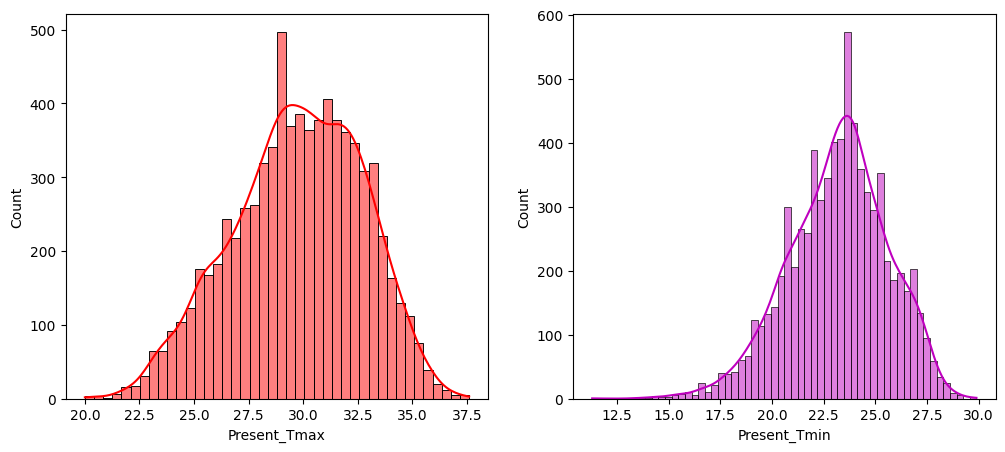

In [46]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.show()

#### observation and conclusion:
- For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree.

### Lets find out maximum and minimum Temperature over period

In [47]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*90)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377437


#### Checking where actually these minima and maxima occur

In [48]:
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-08-11          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
5717      5082.563477       37.0       27.8   11      8  2016  Gyeonggi-do   

            City  
5717  Bucheon-si

In [49]:
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year State City  
7725       4614.76123       23.8       15.1   30      8  2017   NaN  NaN

In [51]:
df.loc[df.Present_Tmin==df.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-08-02          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
2397      5360.226563       31.3       24.8    2      8  2014  Gyeonggi-do   

         City  
2397  Guri-si

In [52]:
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  State   City  
6116      4539.616699       24.6       17.1   27      8  2016  Seoul  Seoul

#### Observation and conclusion:
- Present Maximum Temperature Maxima over four year span recorded at station 18 on 2016-11-08 with Temp of 37.6 degree. Station 18 Located at Bucheon-si city of Gyeonggido state.
- Present Maximum Temperature Minima over four year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.
- Present Maximum Temperature Maxima over four year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree. The station 23 is located in Gurisi of Gyeonggido state
- Present Maximum Temperature Minima over four year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree. The station 17 is located in seoul city.
- We get high value of solar radiation of high temperature day and Low radiation values at low temperature day.
- Maximum Humidity occur when global temeperature minima occur. This might implies that humidity and temperature are inversely related.We will try to verify this.
- Solar radiation has naturally going to have effect on wind speed,precipitation and humidity.








## Let Visualise & gain insight over this by plotting line plot over all station.


#### Line Plot of Present Temperature Maximum over each Station



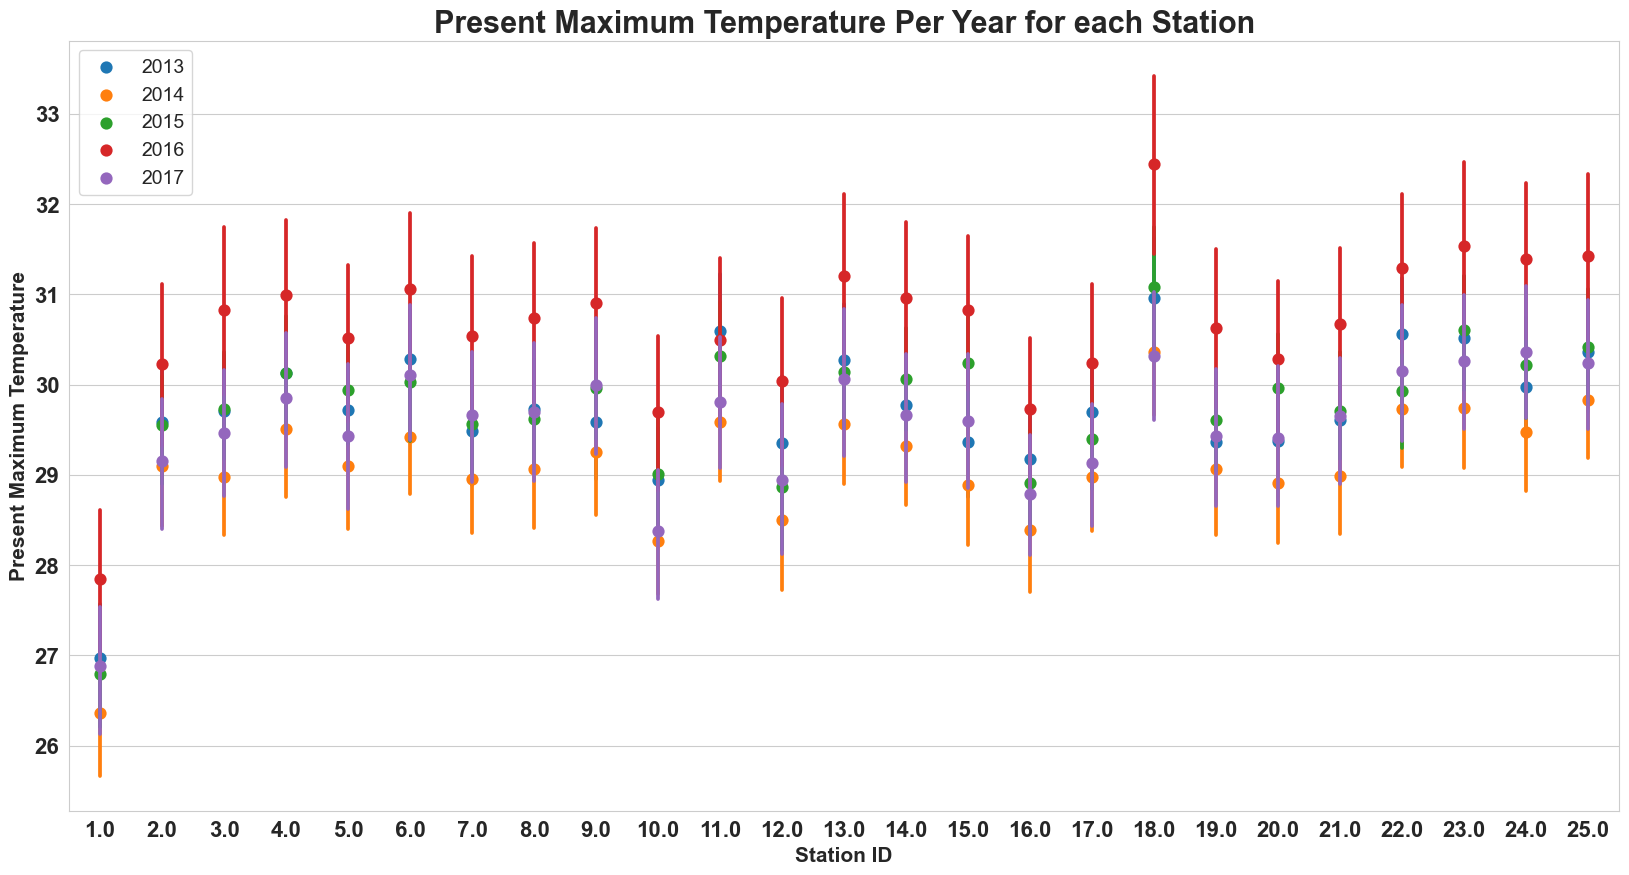

In [53]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

#### Observation and conclusion:
- Over all four year higher temperature recorded at station 18 in compare to rest.
- Station 1 is coolest station over all timeframe.
- We can see 2016 is hottest year and 2014 is coolest year. It will be interesting to explore these two year independently.
- Year 2017 is much cooler compare to Year 2016.
n


#### Line Plot of Present Temperature Minimum over each Station


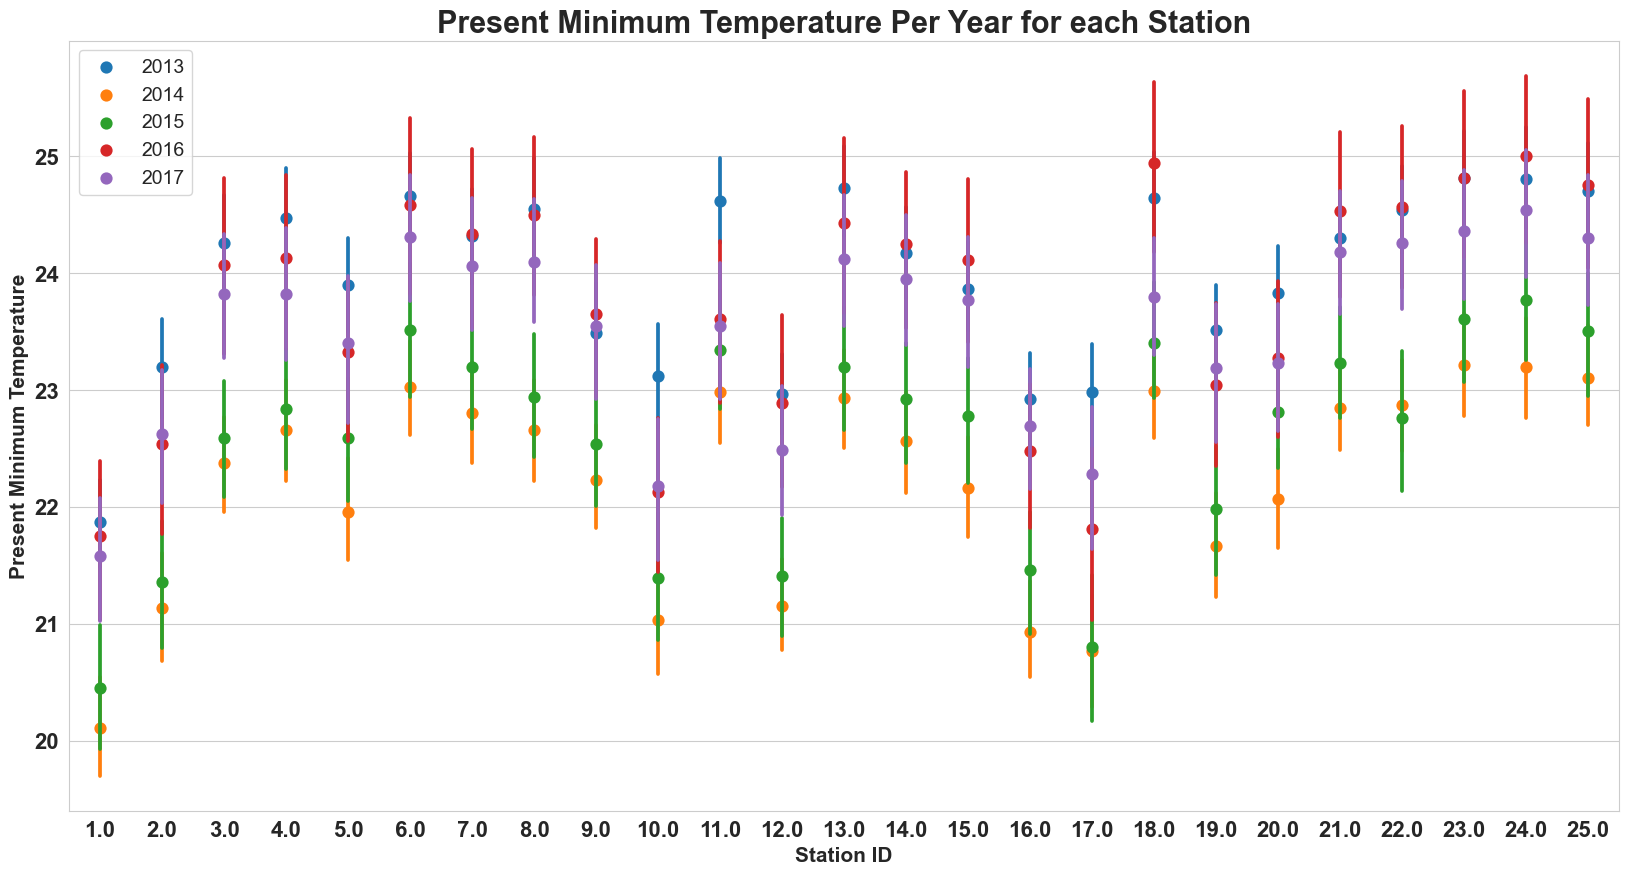

In [54]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)


#### observation and conclusion:
- Year 2014 is coolest year of all time frame.
- Highest Present Minimum Temperature recorded at Station 24 inspite of Not having Highest Present Maximum Temperature. This is implies that over day period minimum temperature drop recorded at station 24.
- Station 1 is coolest station of all time followed by station 17. Must be tourist spot in Summer.

<Axes: xlabel='Month', ylabel='Solar radiation'>

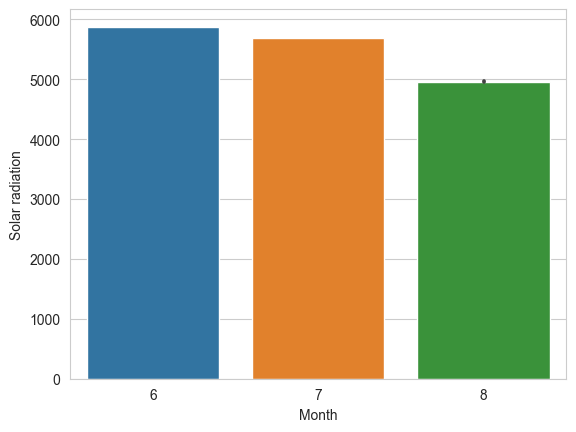

In [57]:
sns.barplot(x='Month', y='Solar radiation',data=df)

#### Observation and conclusion:
The Solar radiation in the month of June is greater than July followed by August

### Exploration of Target Variable

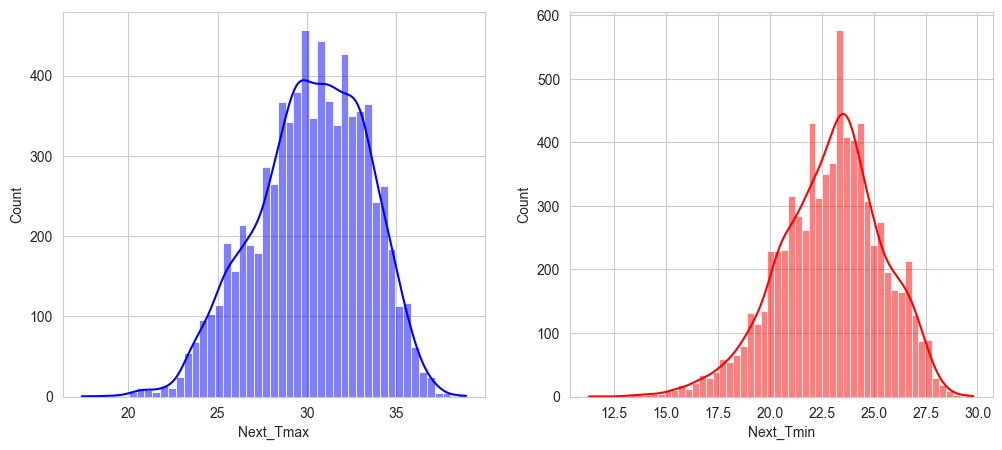

In [62]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='r')
plt.show()

#### Observation and conclusion:
We get same result as we get in case of present temperature.
- For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5 degree.
- For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

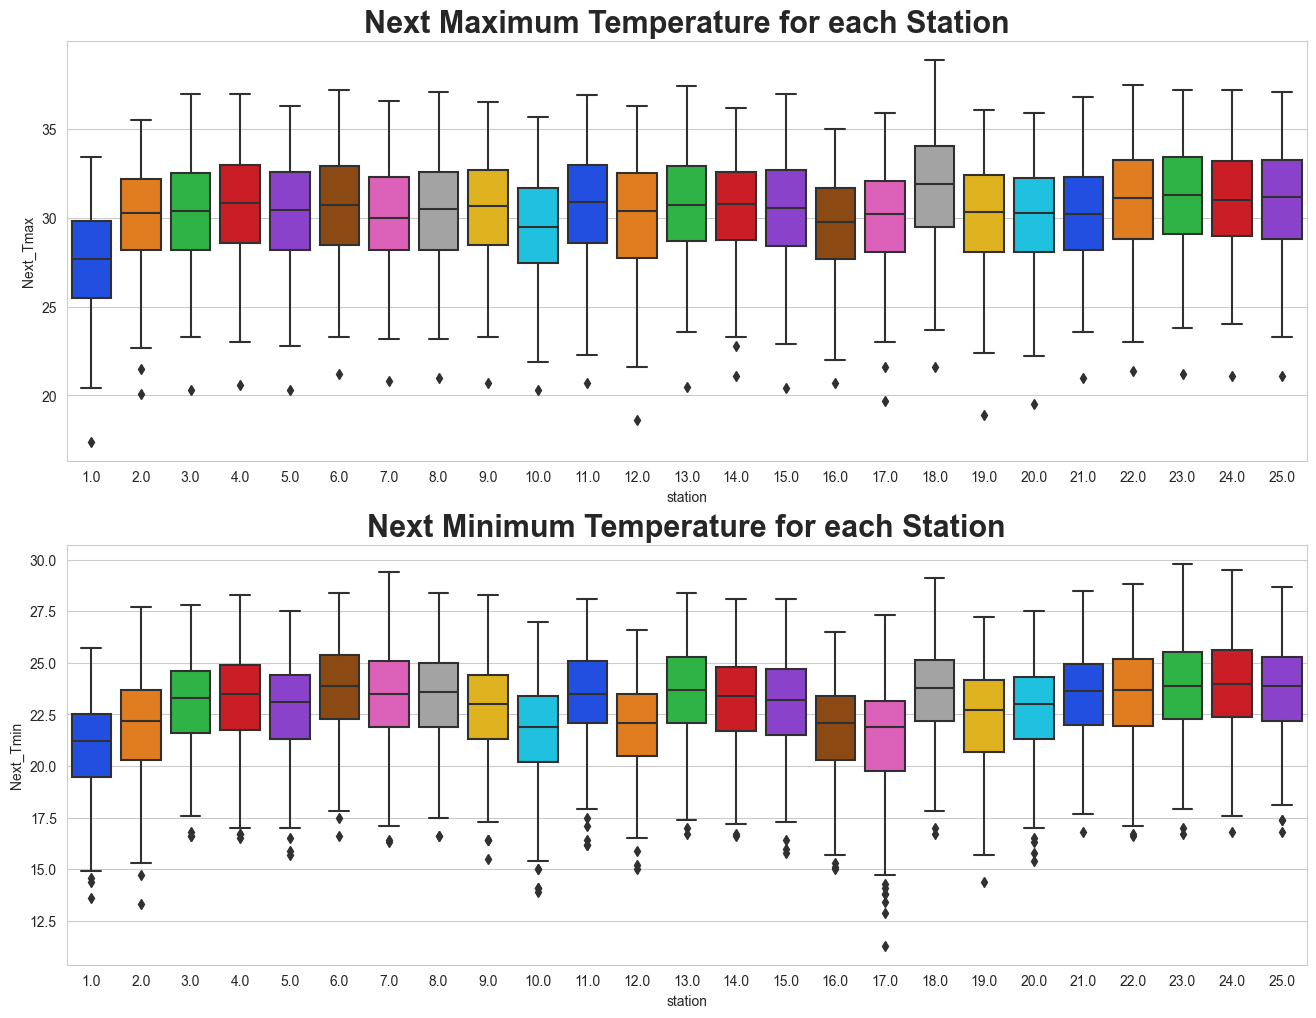

In [64]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=df,palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin',data=df,palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

### Observation and conclusion:
- we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.
- Maximum temperature difference at same station occur in station 17.

### Next Maximum Temperature Vs Cloud cover

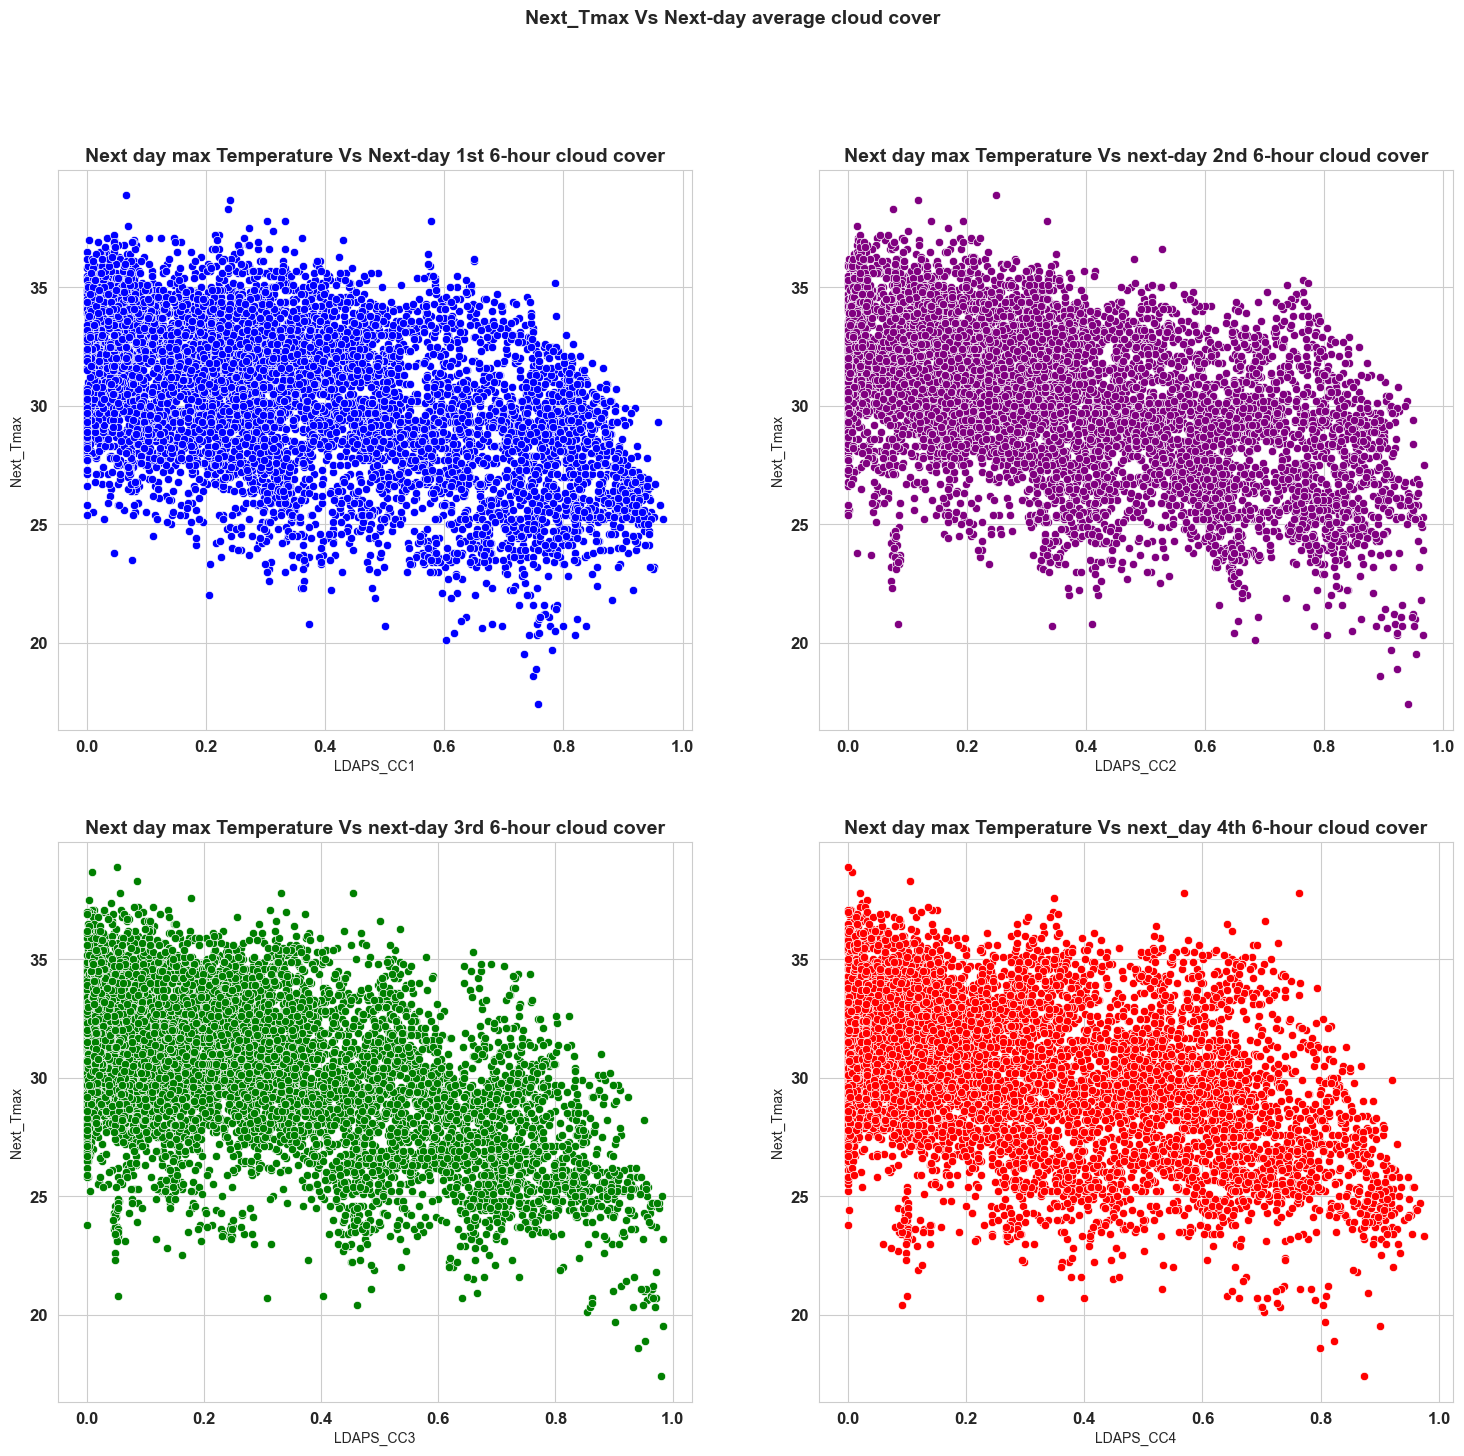

In [65]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation and conclusion:
- Irrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6.

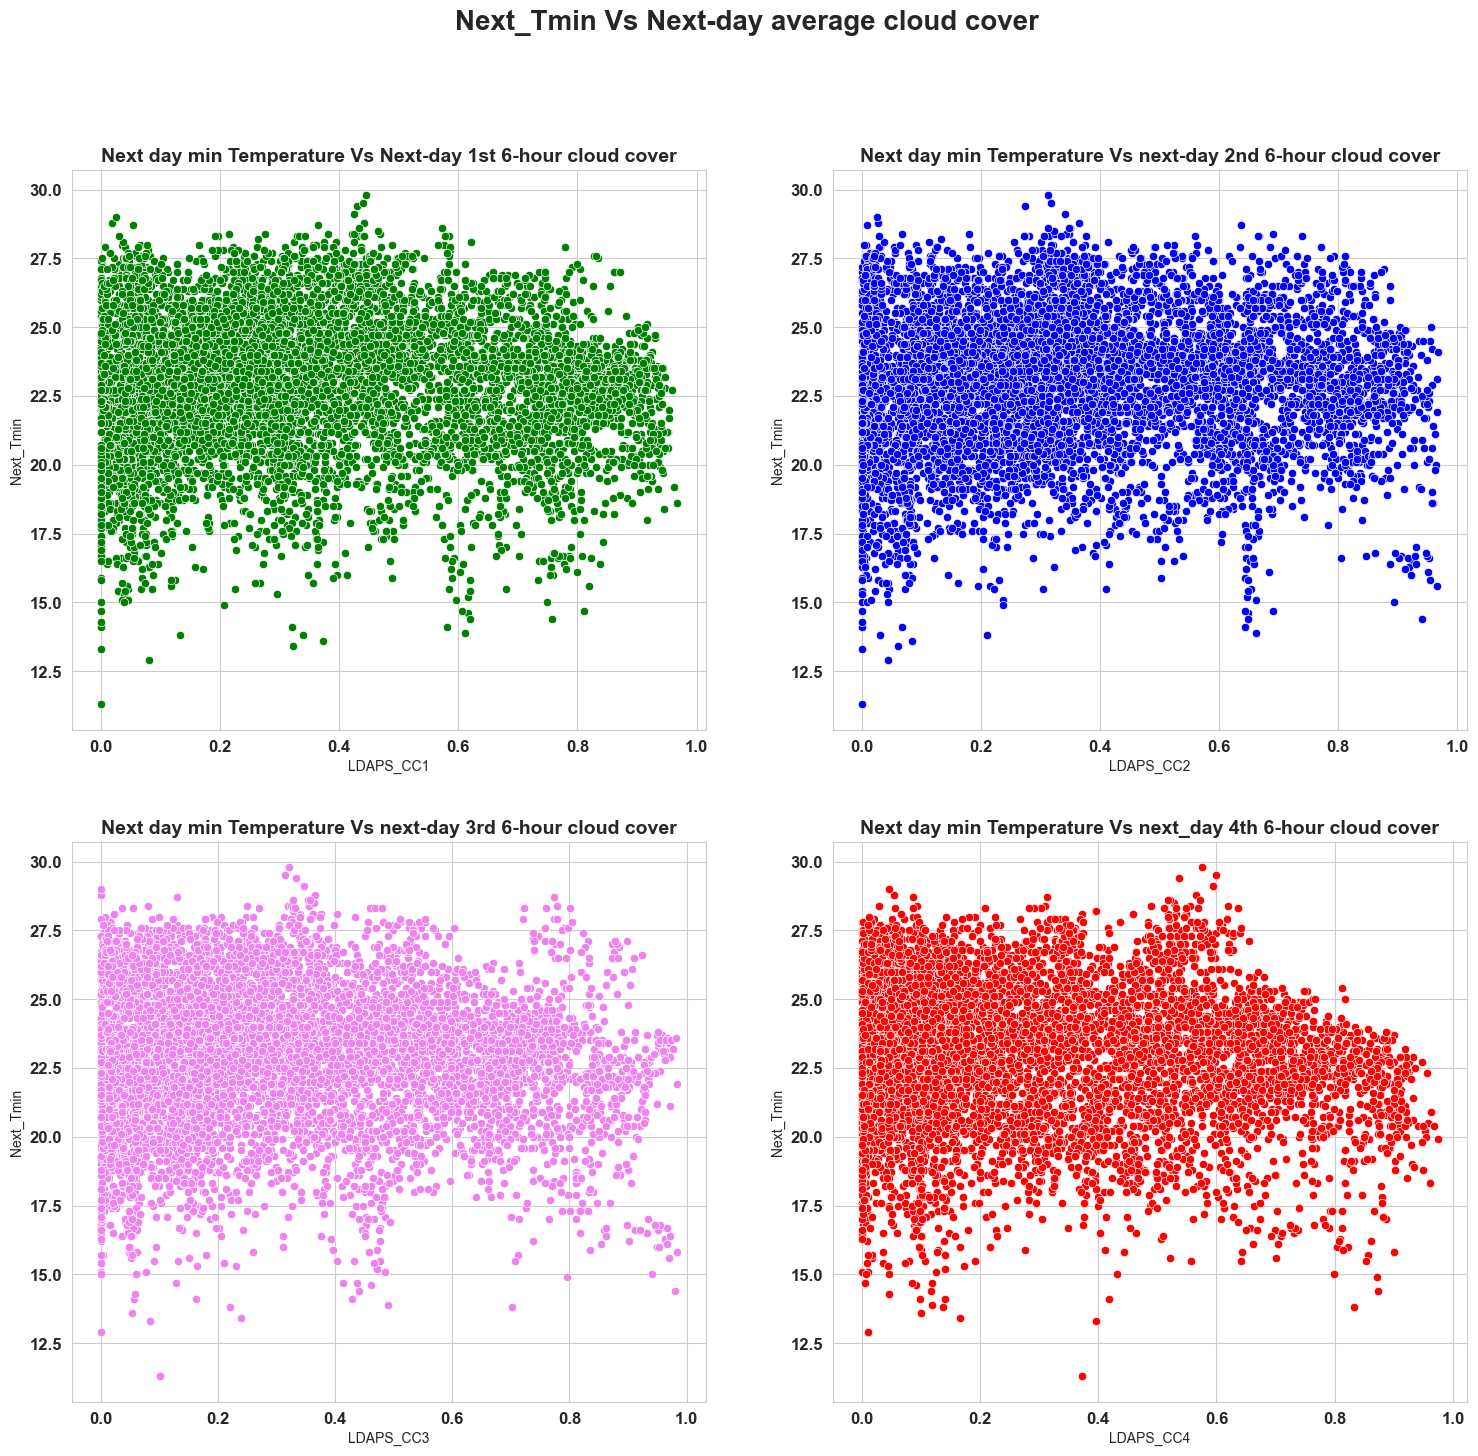

In [66]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation and ocnclusion:
- No significant relation between Next_Tmin and cloud cover in scatterplot.

We can say that Next_Tmin remains unaffected by cloud cover.
#### Solar radiation might most impact on Cloud cover and precipitation, its time to explore them.



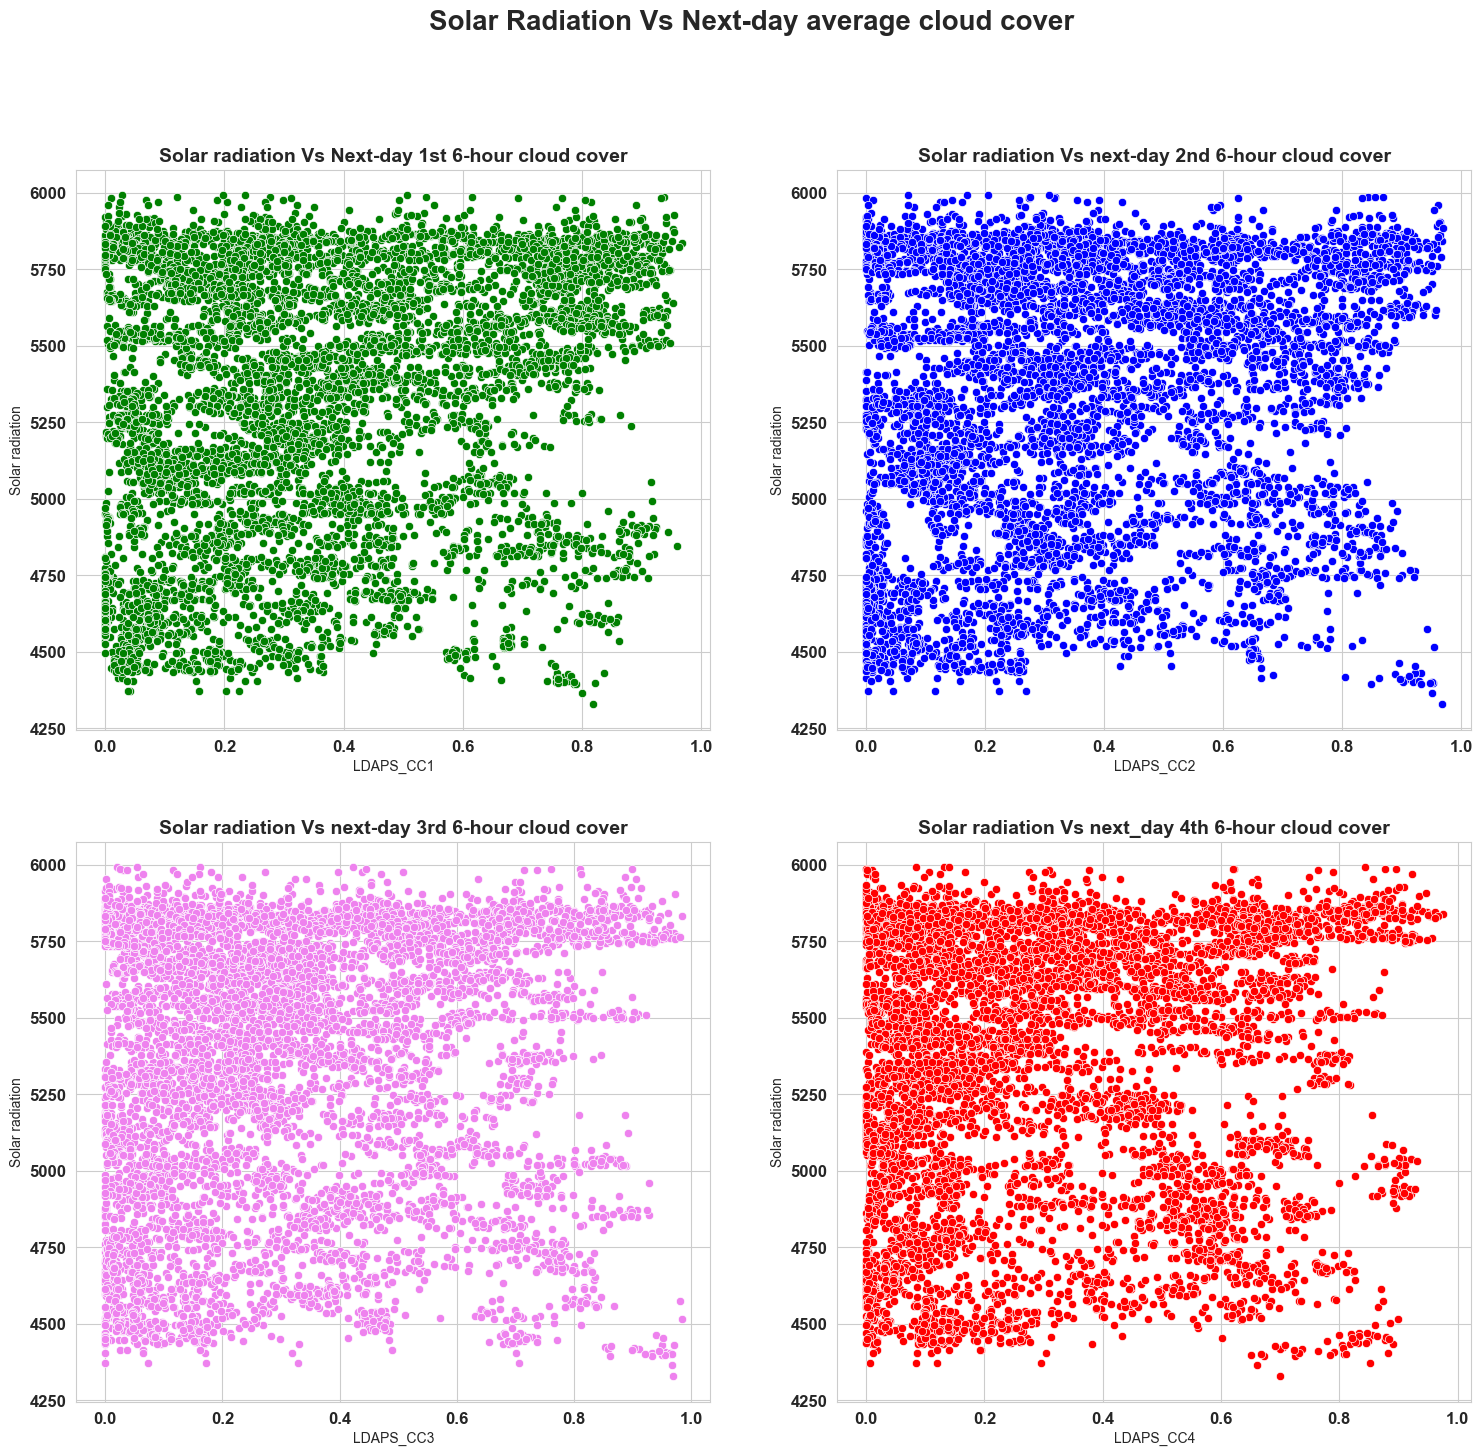

In [67]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation and conclusion:

We can definitely say that for cloud cover greater than 0.7 high value solar radiation contributed most.

### Precipitation VS Solar radiation

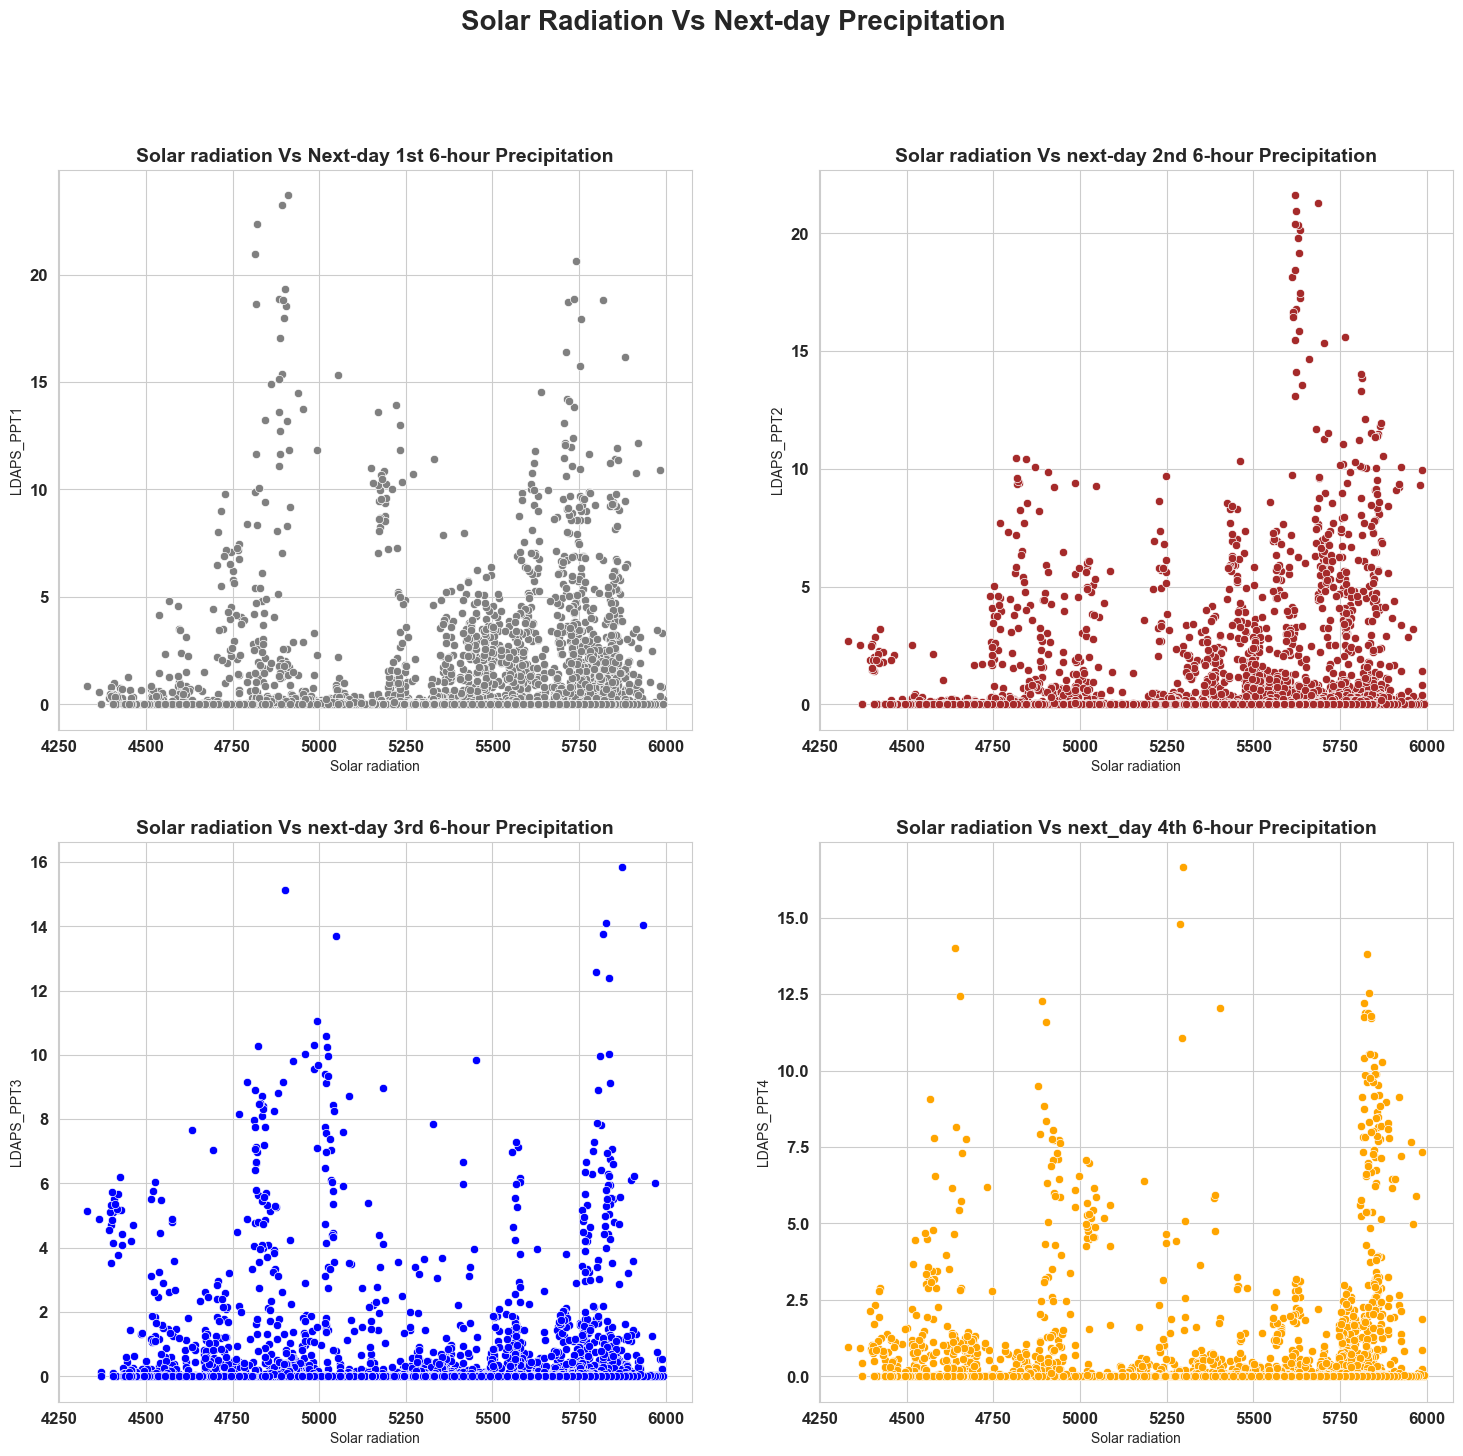

In [68]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation and conclusion:
- Irrespective of to which 6 hr quarter reading belong, solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).
- if we consider scatterplot of solar radiation vs cloud cover along with above scatter plot, we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud cover.

### This all give rise to few questions here :
1. Where relative humidity and wind speed fit in this equation of precipitation?
2. Latent heat means heat absorption at constant temperature, there has to some effect of latent heat flux variation on relative humidity.
3. Another interesting thing to look forward is wind tend to blow clound. What is wind speed value in relative terms when cloud cover is high?
4. Another interesting thing to look forward is wind tend to blow clound. What is wind speed value in relative terms when cloud cover is high?
5. Variation of temperature over duration of one year period?


### Let's start the investigation from the last question.


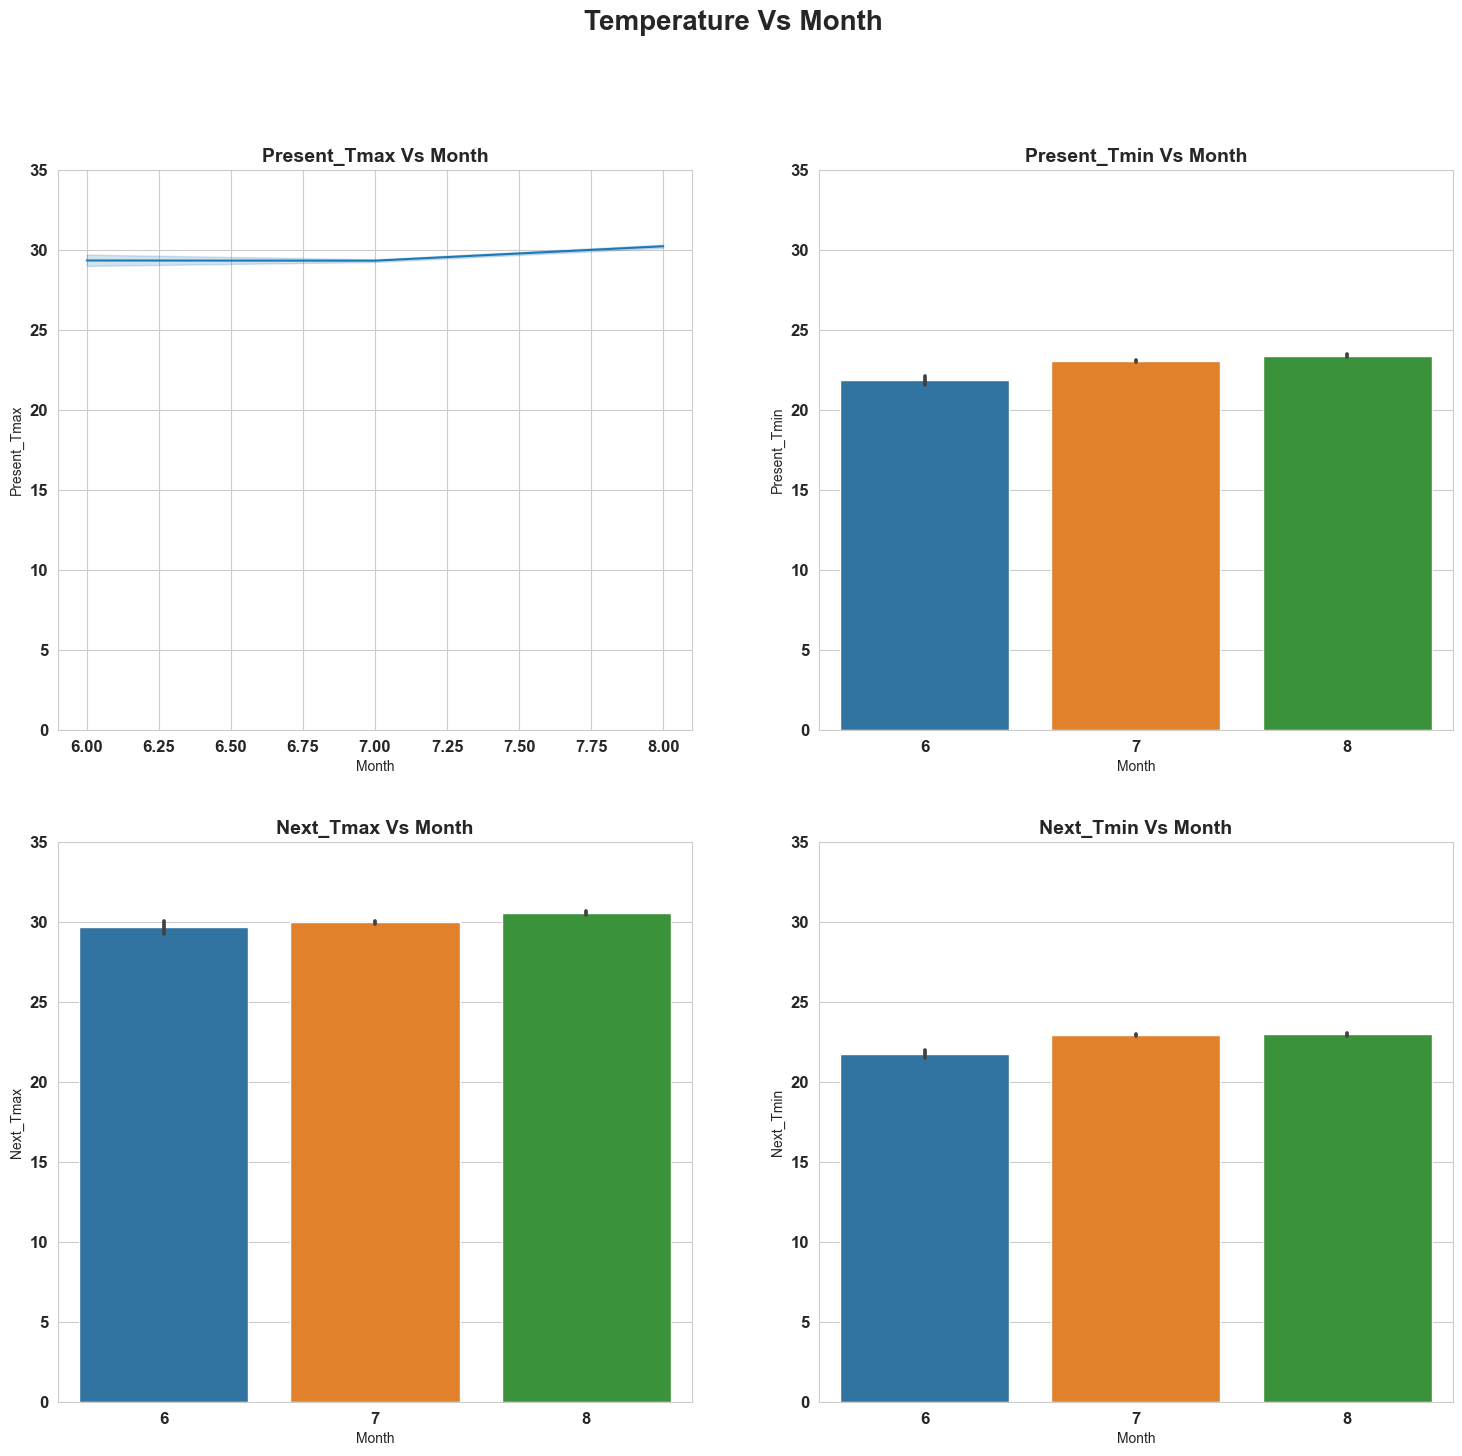

In [70]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

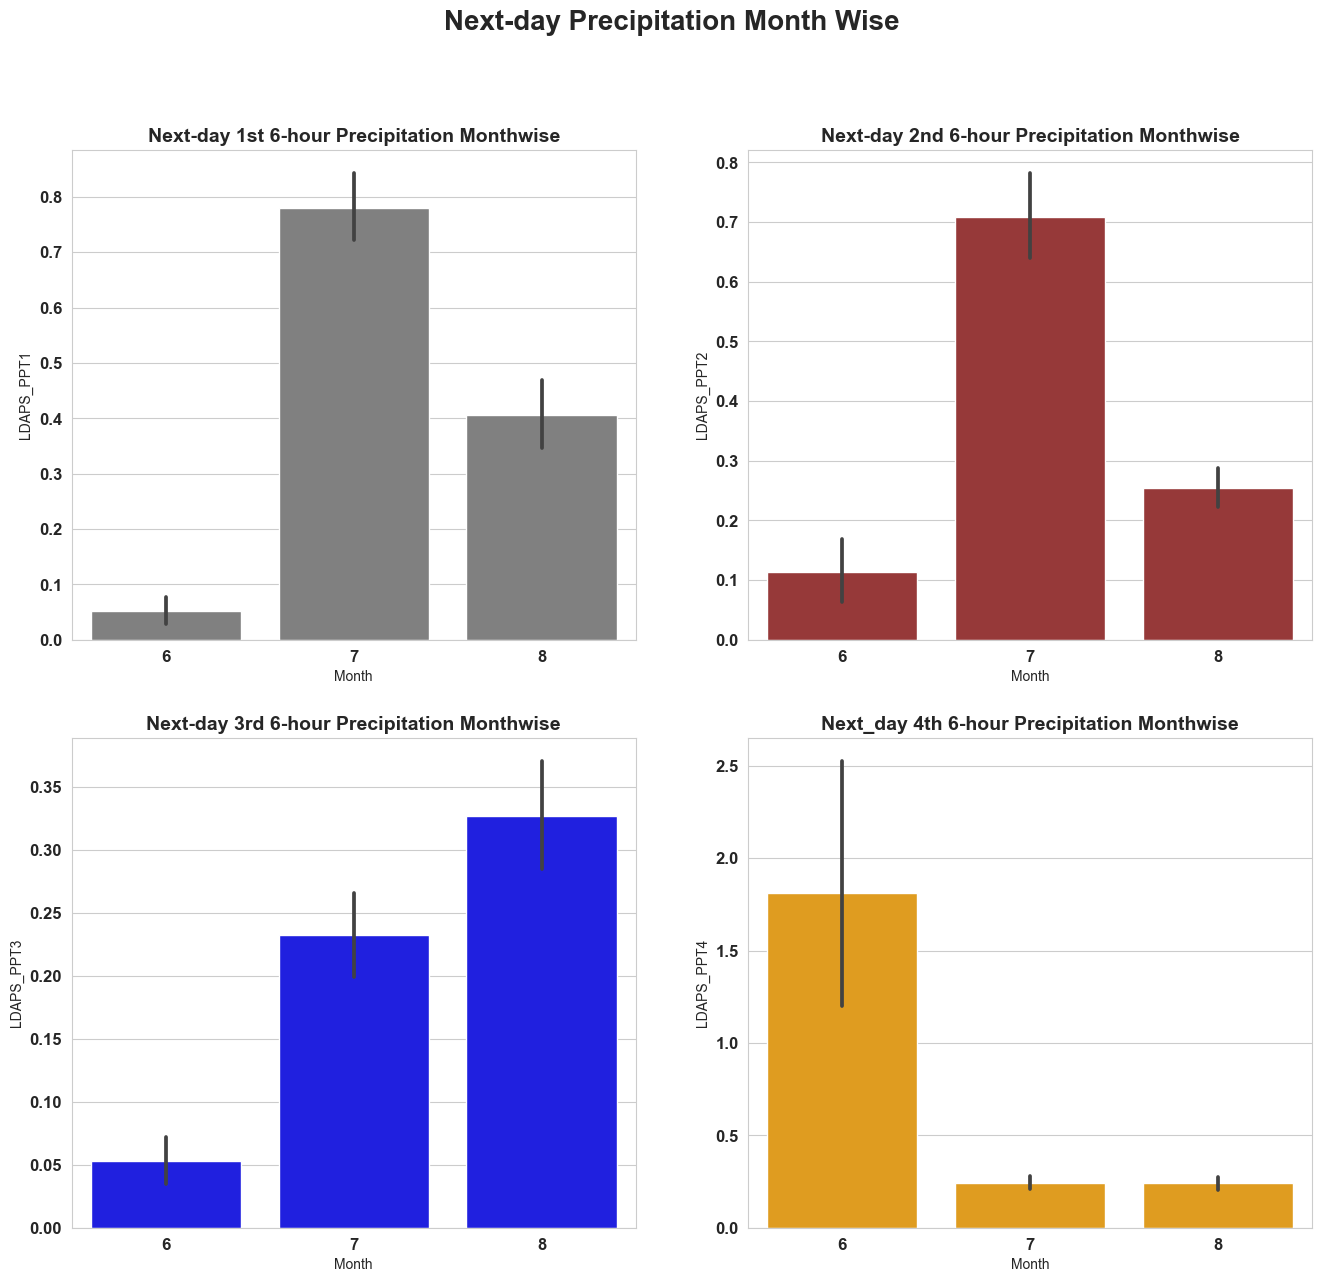

In [71]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation and conclusion:
- In 7th Month highest precipitation observed in 1st quarter of day.
- In 7th Month highest precipitation observed in 2nd quarter of day.
- In 8th Month highest precipitation observed in 3rd quarter of day.
- In 6th Month highest precipitation observed in 4st quarter of day.


Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.724207856747


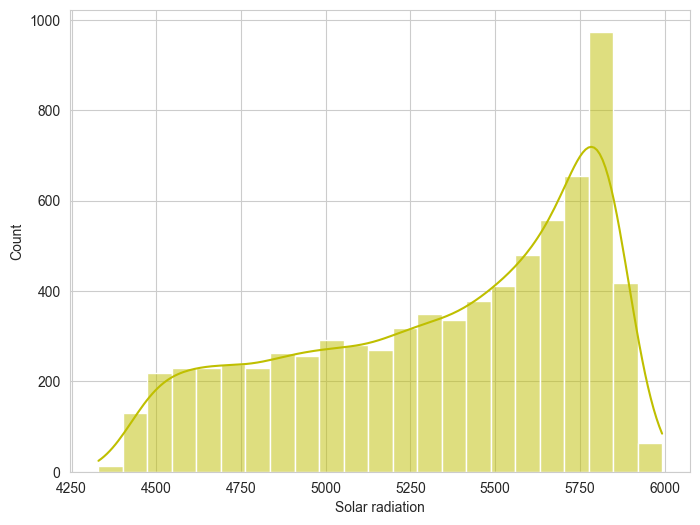

In [72]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

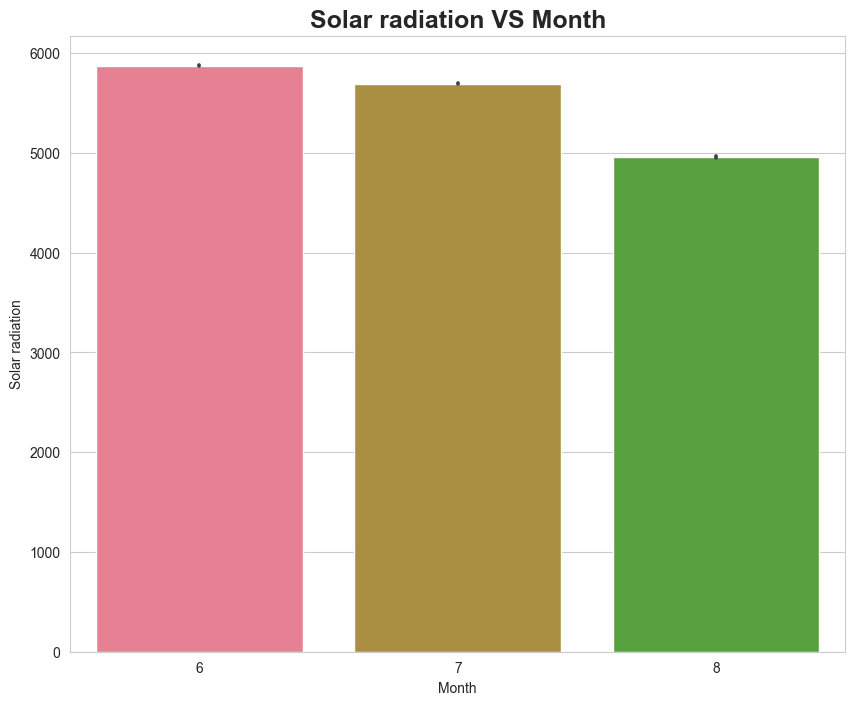

In [73]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

#### observation and conclusion:
- Solar Radiation data is left skewed.
- It has its minimum value at 4329.52 Wh/m2 and maximum values at 5992.89 Wh/m2.
- For most of reading solar radiation values lies in the range 5600 to 5850.
- Minimum solar radiation occur in month of 8.


Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


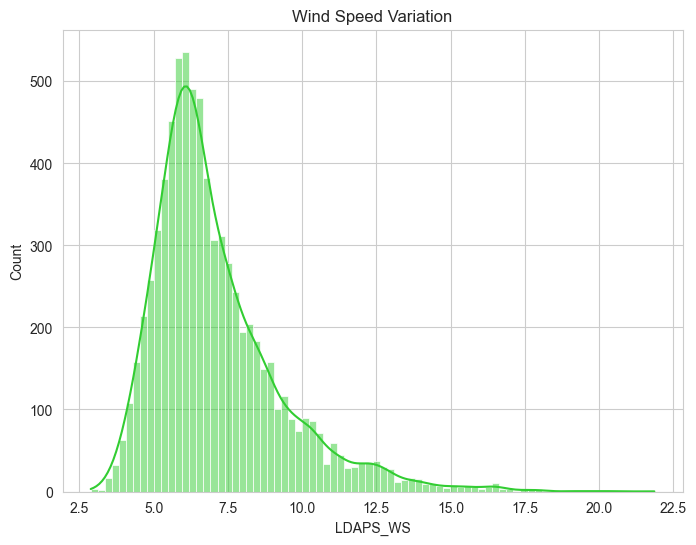

In [74]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

#### Observation and conclusion:
- It have its minimum value at 2.88m/s and maximum values at 21.85m/s
- For most of reading values lies in the rabge 5m/s to 8m/s
- Graph is slightly right skewed.

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


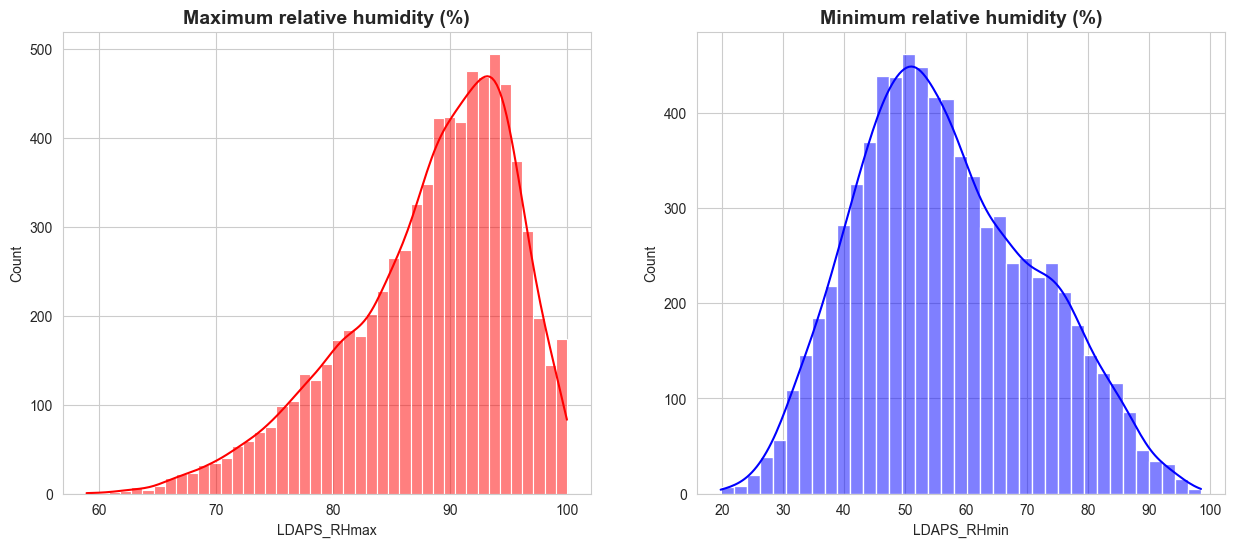

In [75]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

#### Observation and conclusion:
- Data of Maximum Relative humidity is left skewed and Data of Minimum Relative humidity is slightly right skewed.
- Maximum Relative humidity for most of the days lie in the range 90 to 97.
- Maximum Relative humidity lies in the range 45 to 62.


Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


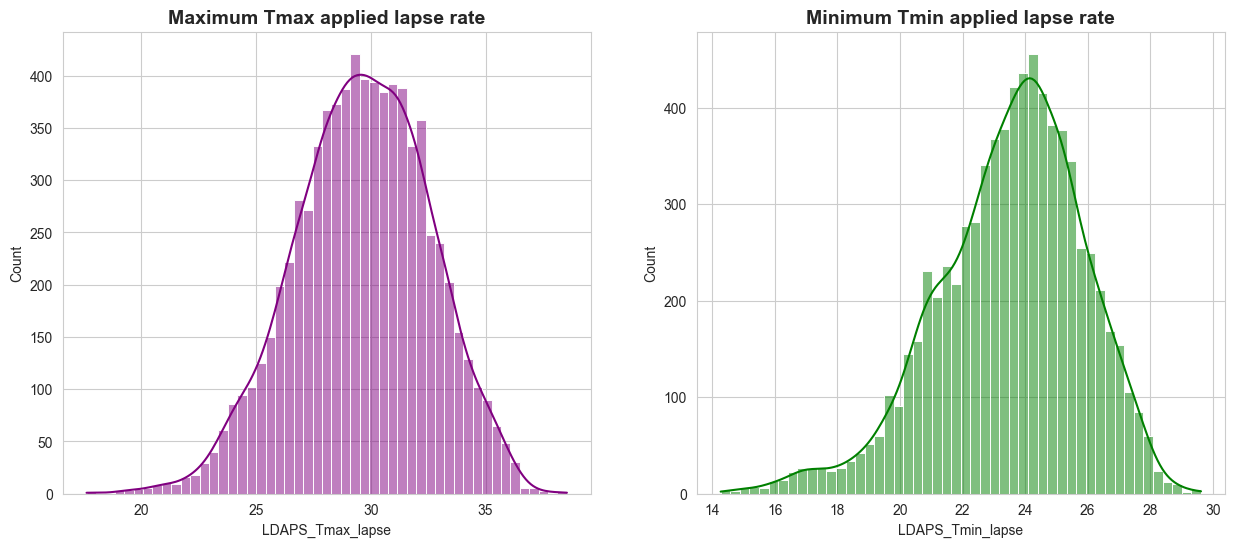

In [76]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))

#### Observation and conclusion:
- Tmax and Tmin for applied lapse rate are almost normally distributed.
- Tmax_lapse for majority of days its values lies in the range 27 to 33 (Â°C).
- Tmin_lapse for majority of days its values lies in the range 23 to 26 (Â°C).

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


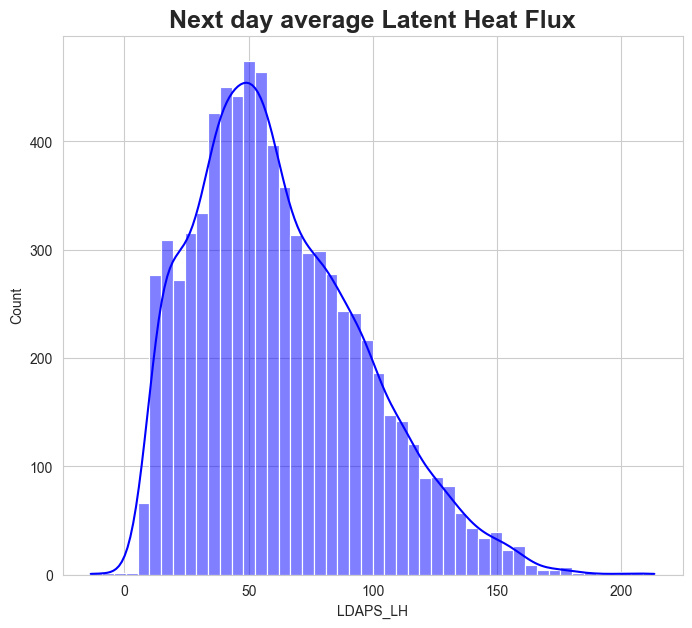

In [77]:
plt.figure(figsize=(8,7))
sns.histplot(df['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

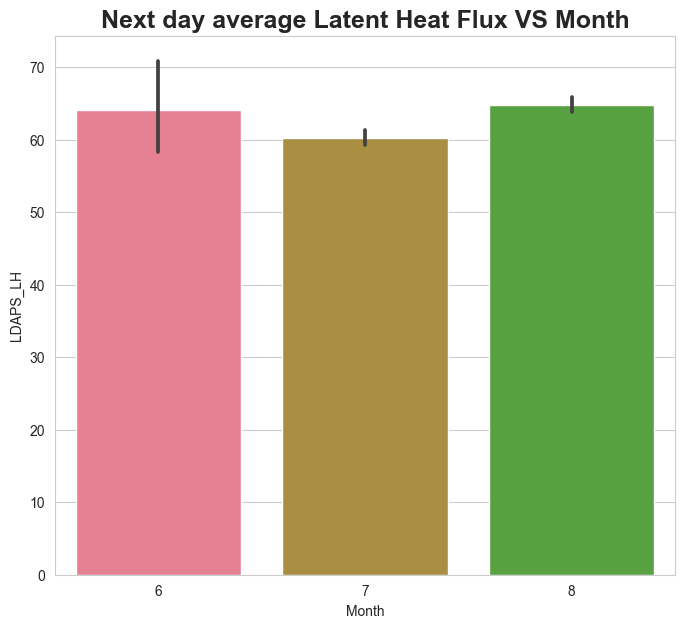

In [78]:
plt.figure(figsize=(8,7))
sns.barplot(y=df['LDAPS_LH'], x=df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

Minimum Latent Heat Flux observe in month of July.

### Encoding categorical data

In [79]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], object: ['State', 'City']}

In [80]:
# Using Label Encoder on categorical variable
Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [81]:
# Droping unnecessary columns
df.drop(['Date'], axis=1, inplace=True)

## Feature selection and Engineering
### 1.  Outliers Detection and Removal

In [82]:
df.shape

(7588, 29)

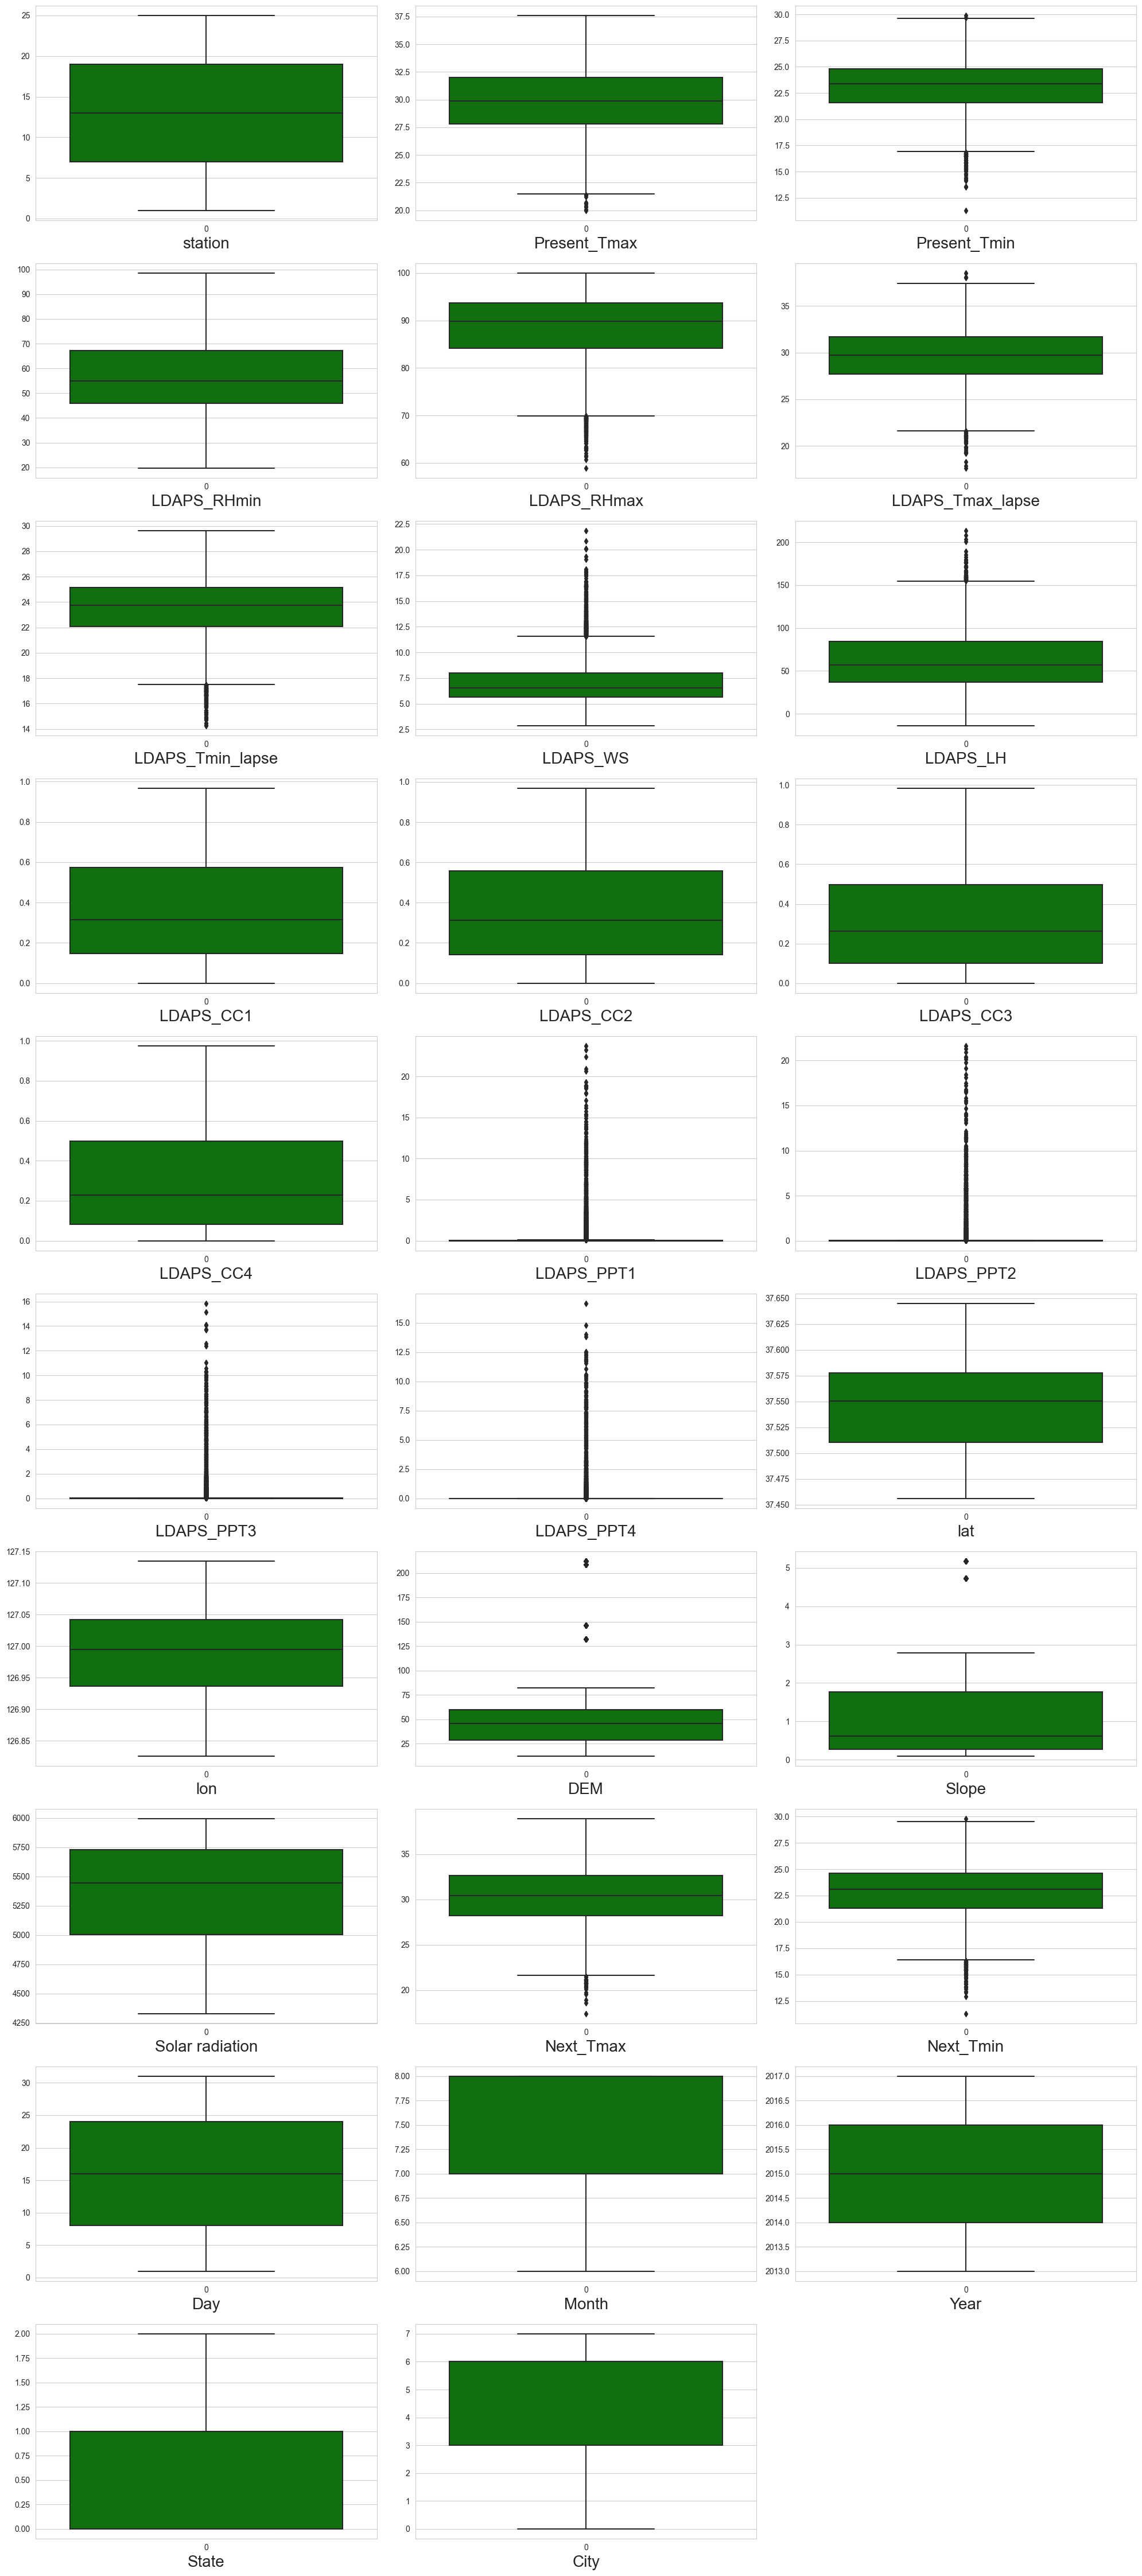

In [83]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

from the above boxplot we can see that outliers exist in the given dataset. So lets remove them.
d

## 1. Outliers removal using Zscore method

In [84]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


We are losing 11.18 % of data. Its big but we can afford it. Considering we have a lot of rows in our datatset for ML model building.

## 2. Skewness of features

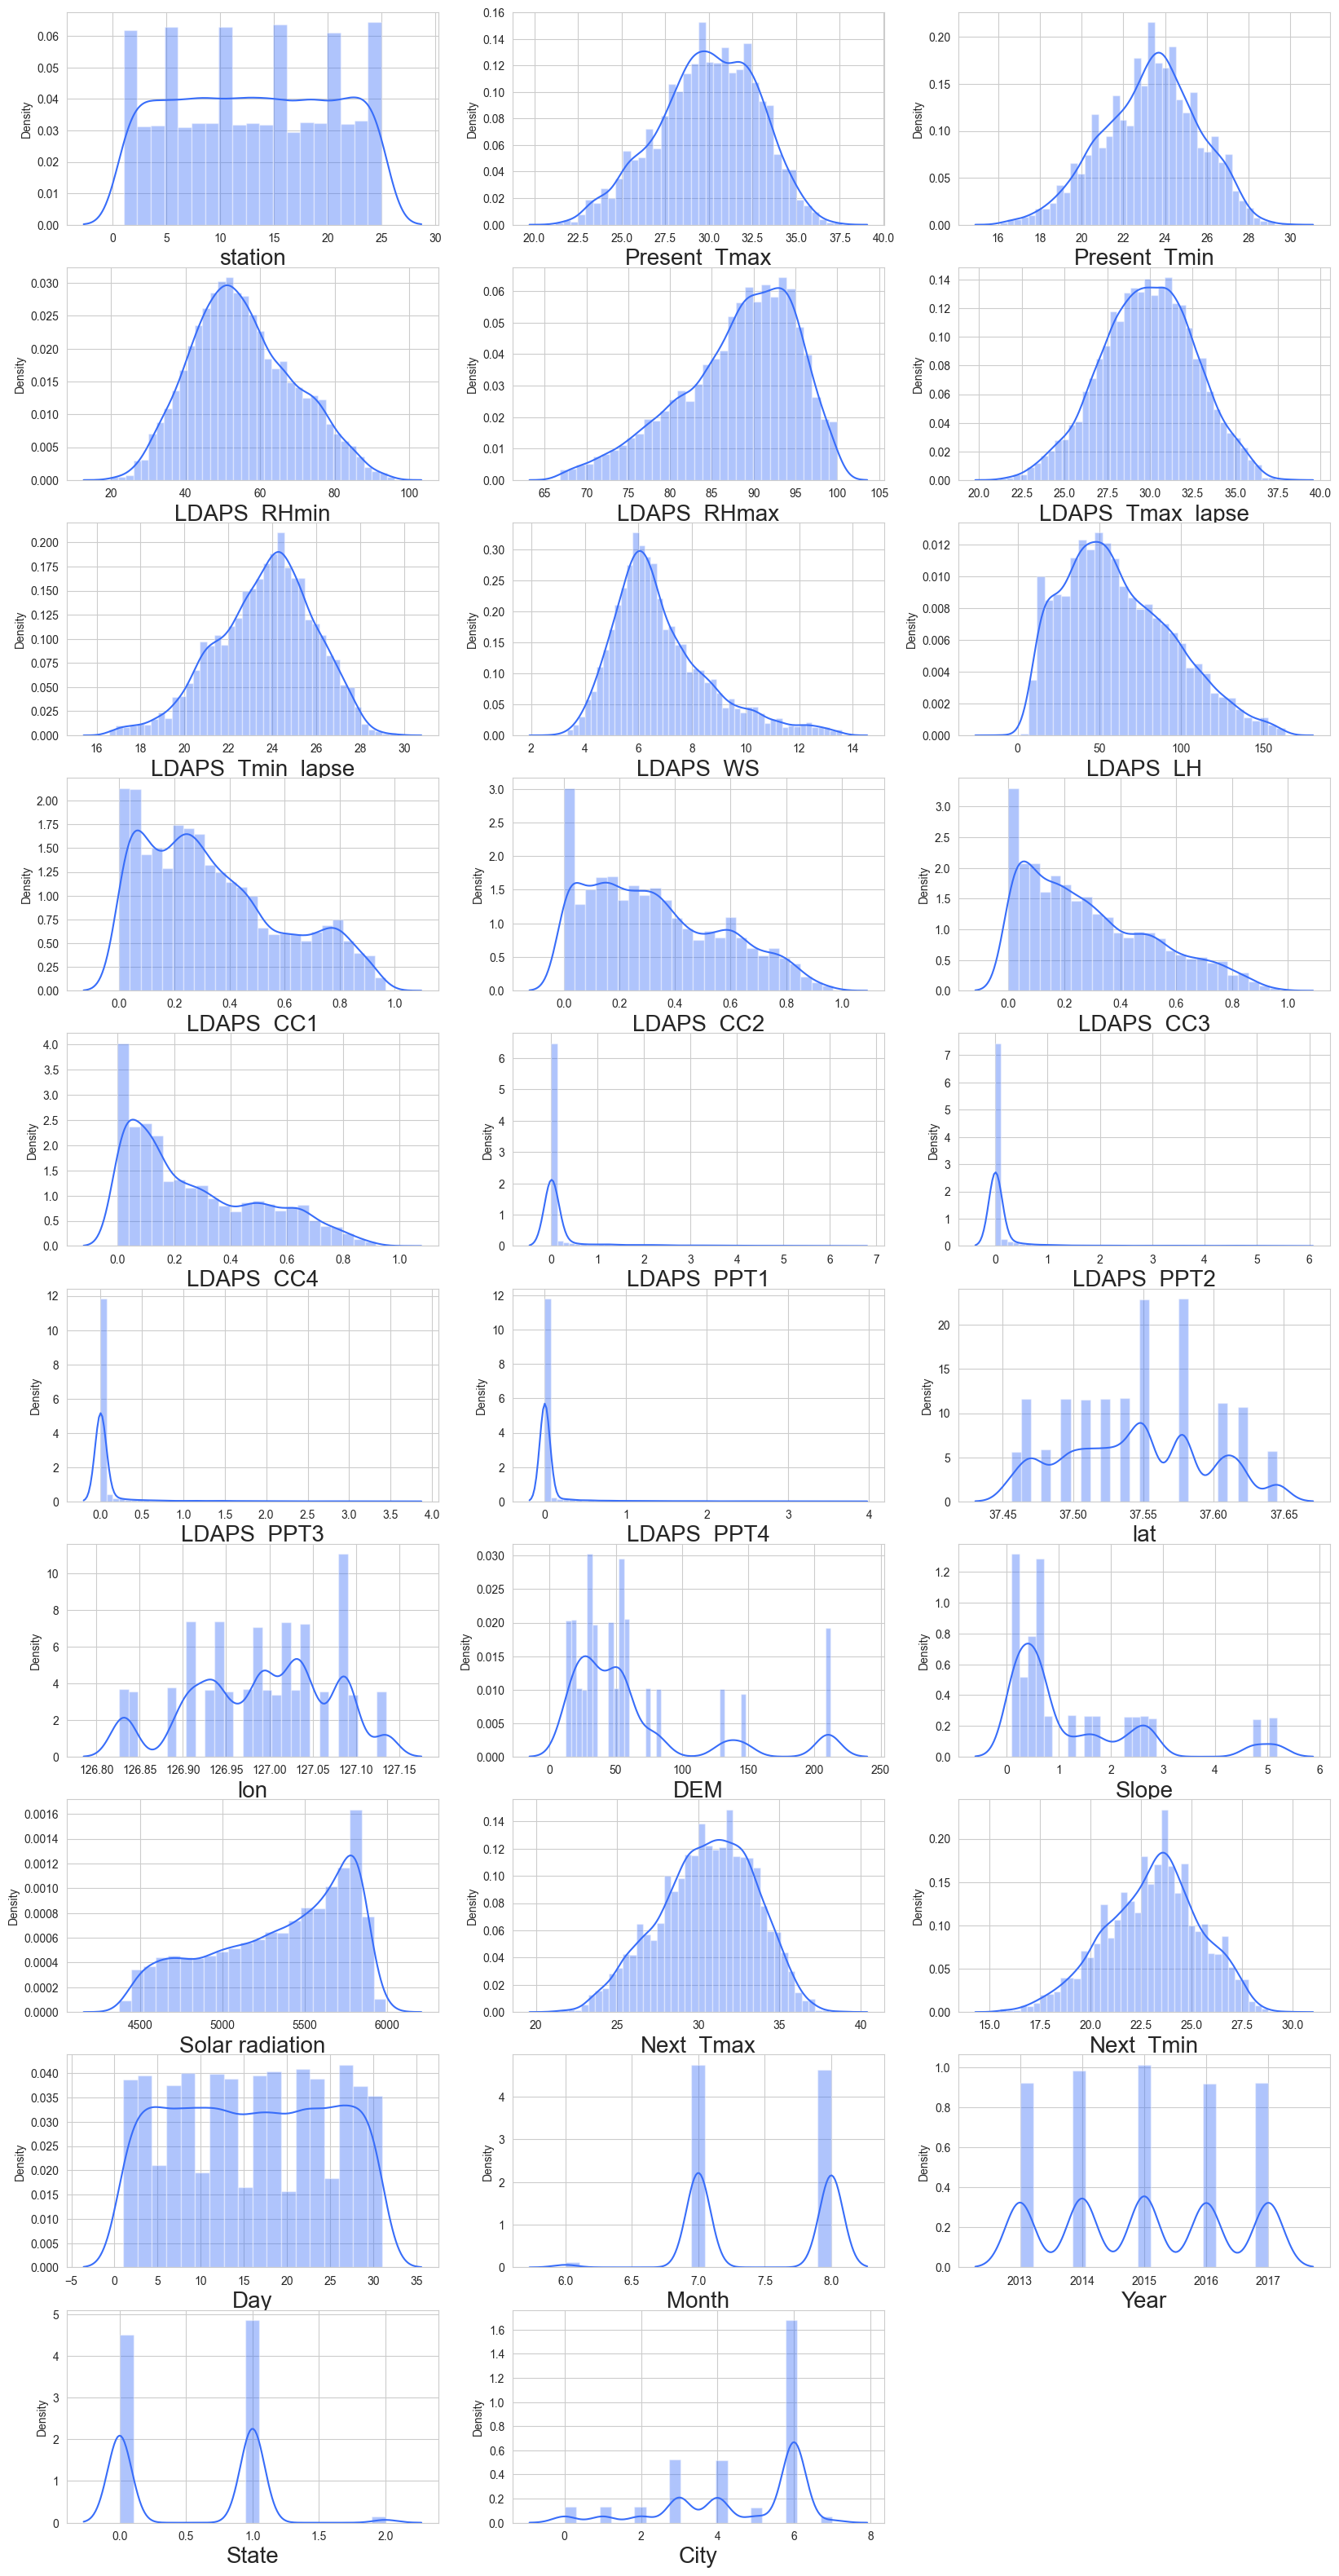

In [85]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()


##### Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

##### We also going to ignore sknewness in target feature.

In [86]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.168571
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.

In [87]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [88]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.103320
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.027814
LDAPS_WS            0.007615
LDAPS_LH           -0.030736
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.094449
LDAPS_CC4           0.142061
LDAPS_PPT1          1.617538
LDAPS_PPT2          1.820237
LDAPS_PPT3          1.995359
LDAPS_PPT4          2.267954
lat                 0.106983
lon                -0.277547
DEM                 0.038830
Slope               0.233799
Solar radiation    -0.172156
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.000057
Month              -0.087154
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

##### For LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed but it got reduced.

## 3. Corrlation

In [89]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005032     -0.130708     -0.082712    -0.073118   
Month             0.011309      0.171614      0.104576    -0.183976   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

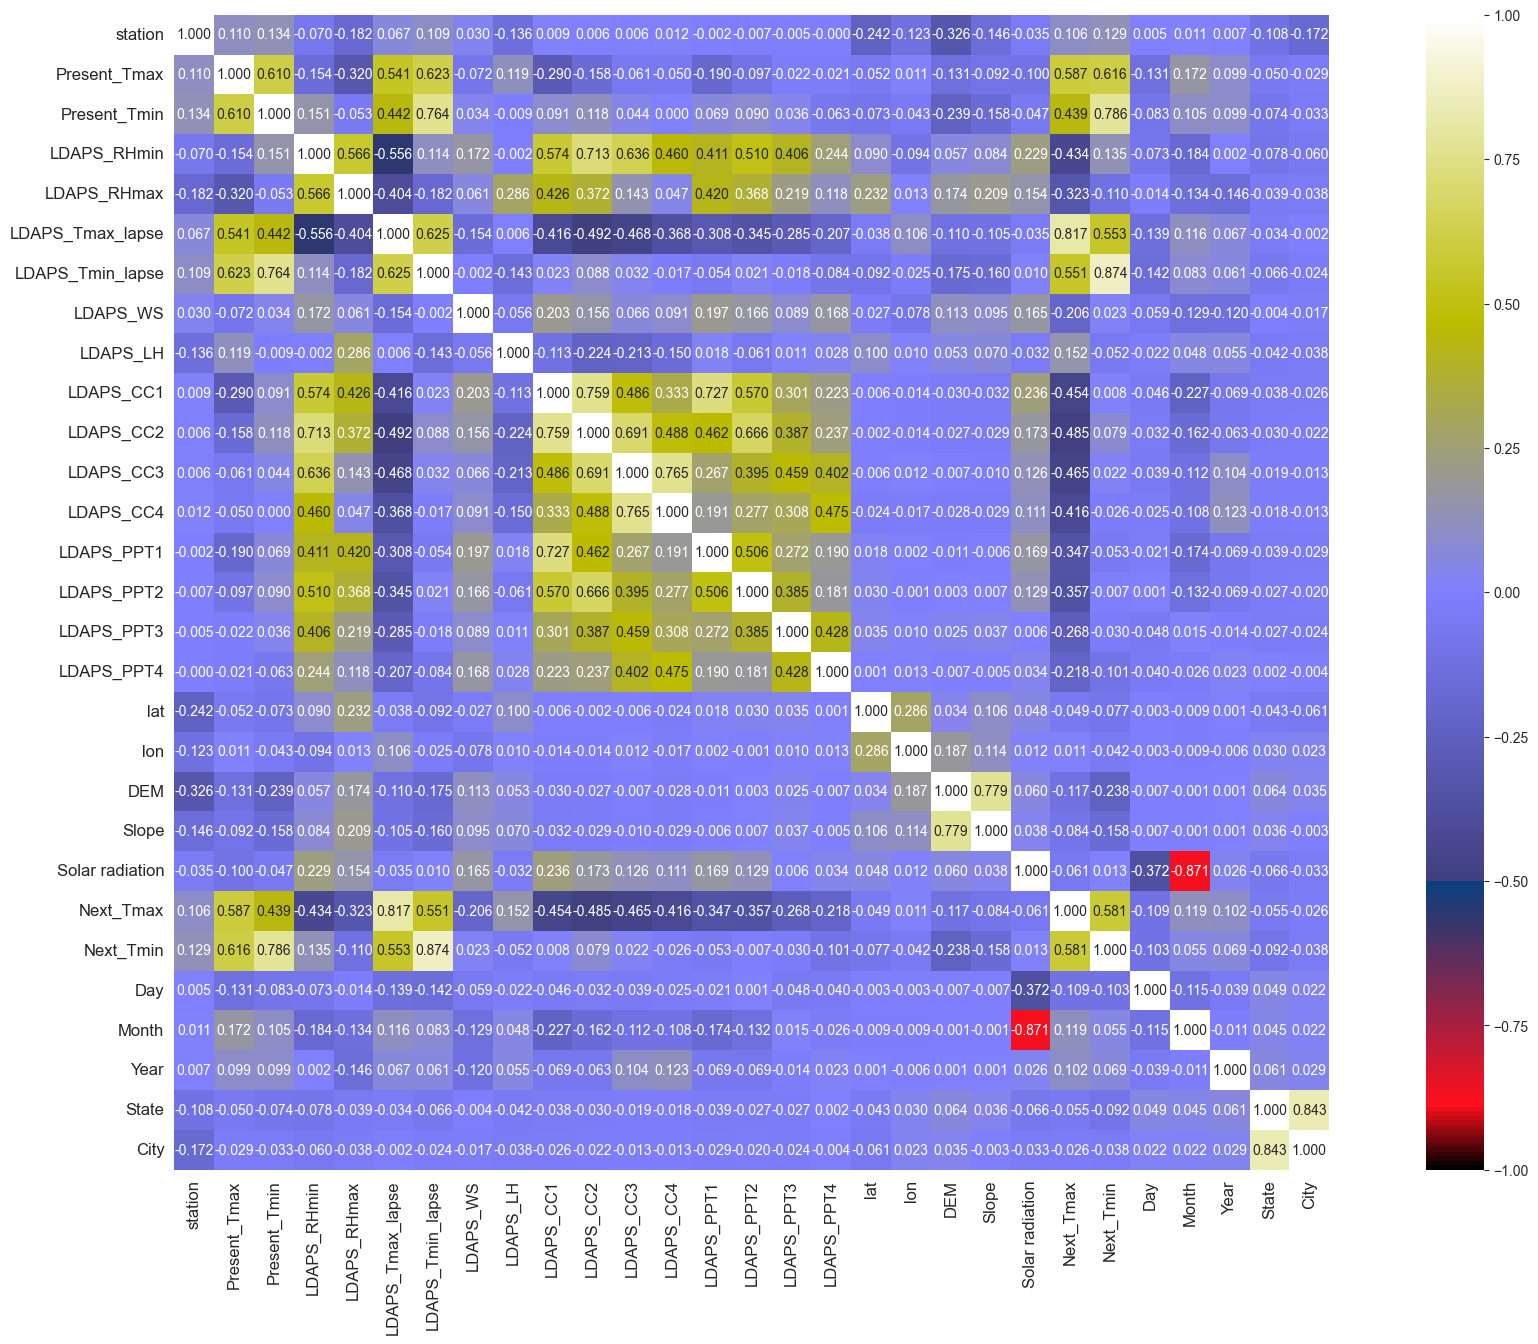

In [90]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

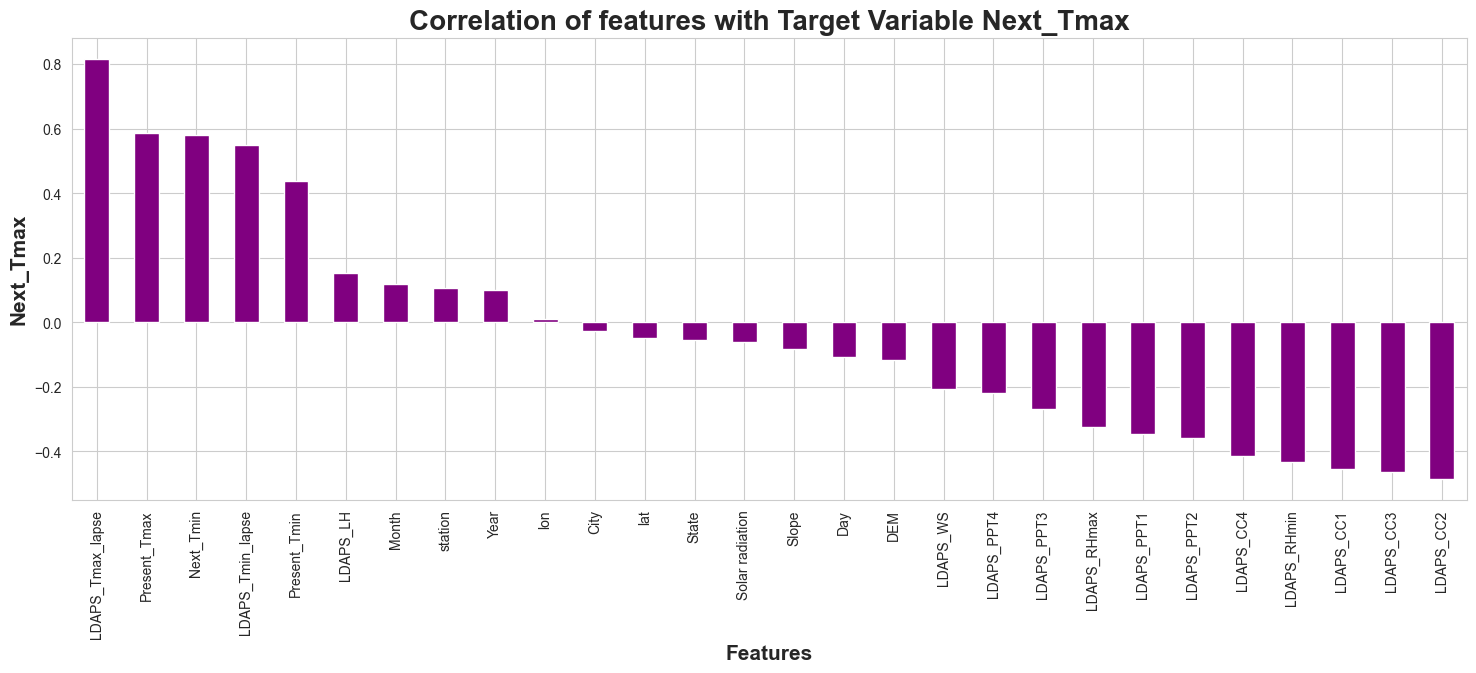

In [91]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()


##### Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.

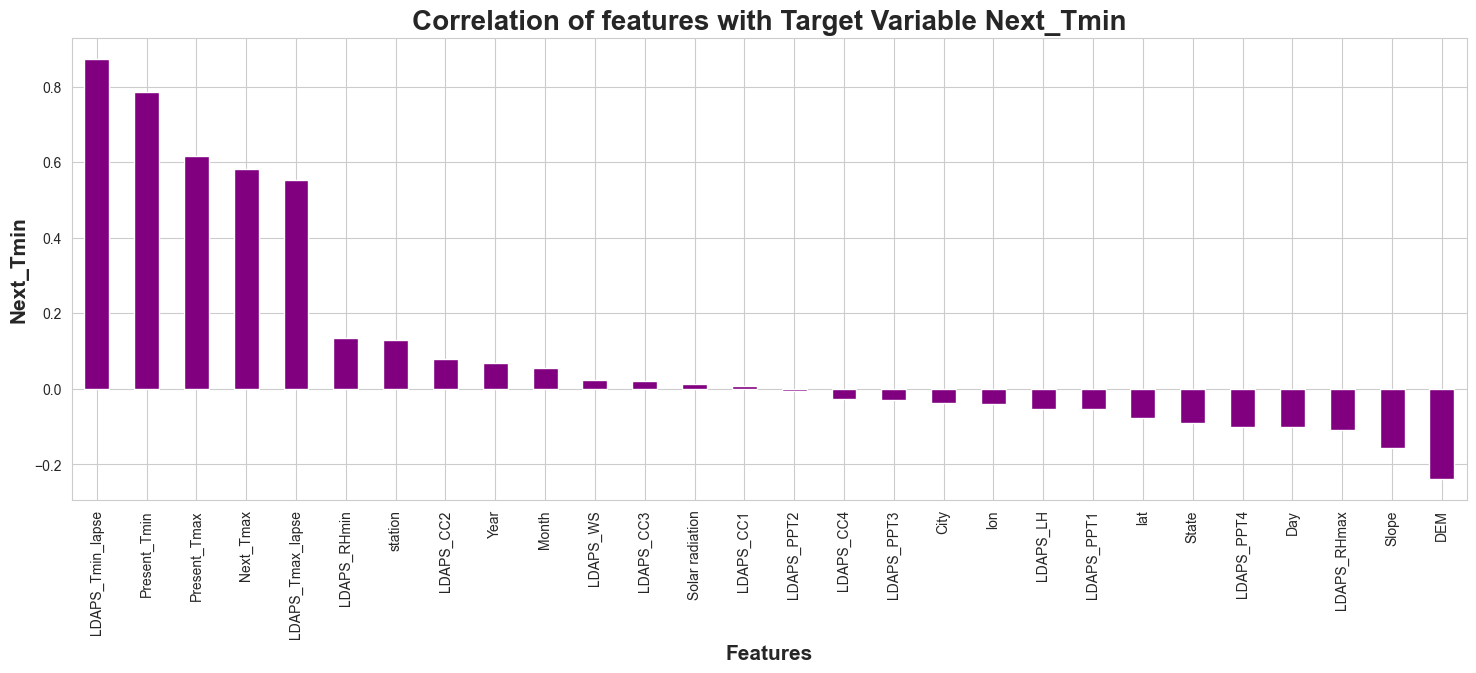

In [92]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

##### Temperature related feature are moderately or highly correlated with Target Feature.

# Machine Learning Model Building For Next_Tmax

## Standard Scaling

In [93]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [94]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### Checking Multicollinearity between features using variance_inflation_factor

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.371722           station
1     2.903305      Present_Tmax
2     3.405399      Present_Tmin
3     6.098440       LDAPS_RHmin
4     2.609329       LDAPS_RHmax
5     6.667525  LDAPS_Tmax_lapse
6     8.263539  LDAPS_Tmin_lapse
7     1.232667          LDAPS_WS
8     1.519175          LDAPS_LH
9     4.867446         LDAPS_CC1
10    5.502914         LDAPS_CC2
11    4.571289         LDAPS_CC3
12    2.788001         LDAPS_CC4
13    2.601848        LDAPS_PPT1
14    2.168774        LDAPS_PPT2
15    1.599886        LDAPS_PPT3
16    1.602887        LDAPS_PPT4
17    1.620154               lat
18    1.292628               lon
19    4.623510               DEM
20    3.086186             Slope
21  127.563080   Solar radiation
22    5.675420         Next_Tmin
23   29.643921               Day
24  109.826097             Month
25    1.138793              Year
26    3.617181             State
27    3.642125              City

## PCA

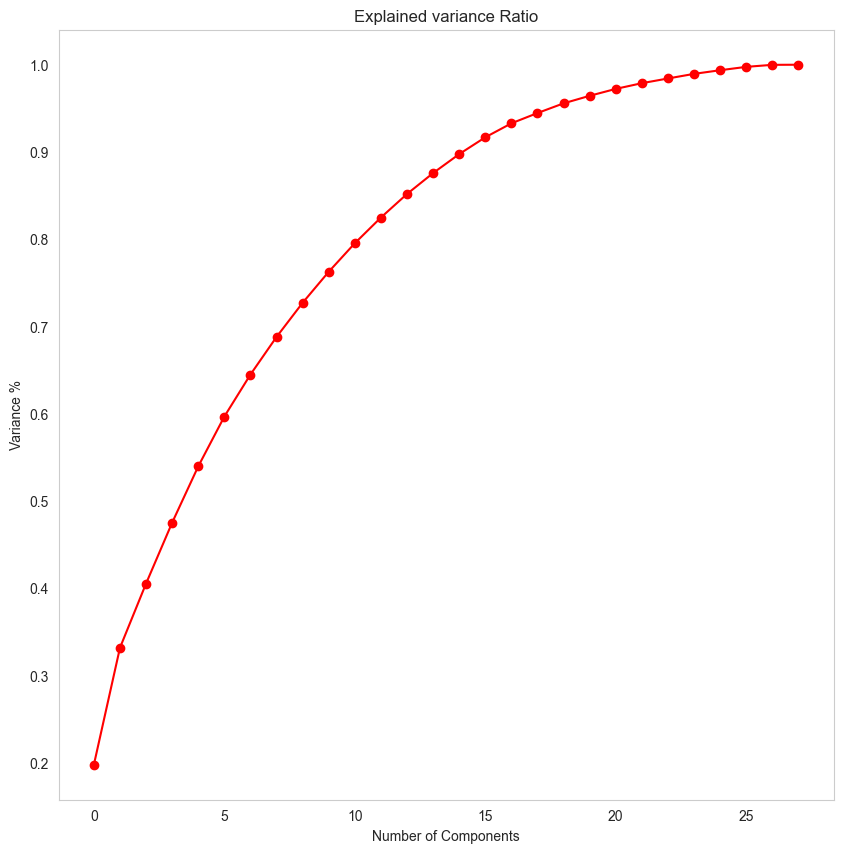

In [96]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#####  AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [97]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [98]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


### Finding best Random state

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8077797748919142 on Random_state 108


## Linear Regression Base Model

In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted temperature:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual temperature:'+'\033[0m\n',Y_test)

Predicted temperature:
 [32.0562119  30.06822274 29.27428528 ... 25.87811141 25.10019464
 32.55957268]


Actual temperature:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [104]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.9944635693387948
Mean squared error : 1.6933572596575868
Root Mean Squared Error: 1.3012906130674988


 R2 Score :
0.8077797748919142


In [105]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6626321287490897


### Applying other ML Models

In [106]:
from sklearn.ensemble import BaggingRegressor

In [107]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7122270683453241
Mean squared error : 0.9046785436151087
Root Mean Squared Error: 0.951145910791351


 R2 Score :
0.8973060691638602


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6090876798561152
Mean squared error : 0.6551272225719422
Root Mean Squared Error: 0.8093992973631384


 R2 Score :
0.9256337069575751


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0607014388489209
Mean squared error : 2.1473561151079137
Root Mean Squared Error: 1.4653859952612873


 R2 Score :
0.7562444230364401


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.1653419971060743
Mean squared error : 2.0500297189332244
Root Mean Squared Error: 1.431792484591683


 R2 Score :
0.7672923585355566


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8338698716546703
Mean squared error : 1.1468271951127287
Root Mean Squared Error: 1.0709001798079636


 R2 Score :
0.8698187400518074


 Error of  XGBReg

In [108]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('====================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.6878975959118068


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.6904893909193935


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.4034571624200485


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.6483580222083575


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.7079425919140855


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

#### here we will consider XGBRegressor for the further process

# Hyper Parameter Tuning : GridSearchCV

In [110]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameter = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'reg_alpha': [0.0, 0.5, 1.0],
    'reg_lambda': [0.0, 0.5, 1.0]
}

In [116]:
GCV = GridSearchCV(XGBRegressor(),parameter)

In [117]:
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_alpha': [0.0, 0.5, 1.0],
                         'reg_lambda': [0.0, 0.5, 1.0]})

In [118]:
GCV.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'reg_alpha': 1.0,
 'reg_lambda': 1.0}

## Final Regression Model

In [119]:
Final_mod =  XGBRegressor(n_estimators=200 ,  max_depth= 7, colsample_bytree=0.5, learning_rate=0.1, reg_alpha=1.0, reg_lambda=1.0 )

Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.575381283108279
Mean squared error : 0.5840019659342511
Root Mean Squared Error: 0.7642002132519011


 R2 Score of Final Model :
0.933707439044407




 True Values Vs Predicted Value plot :


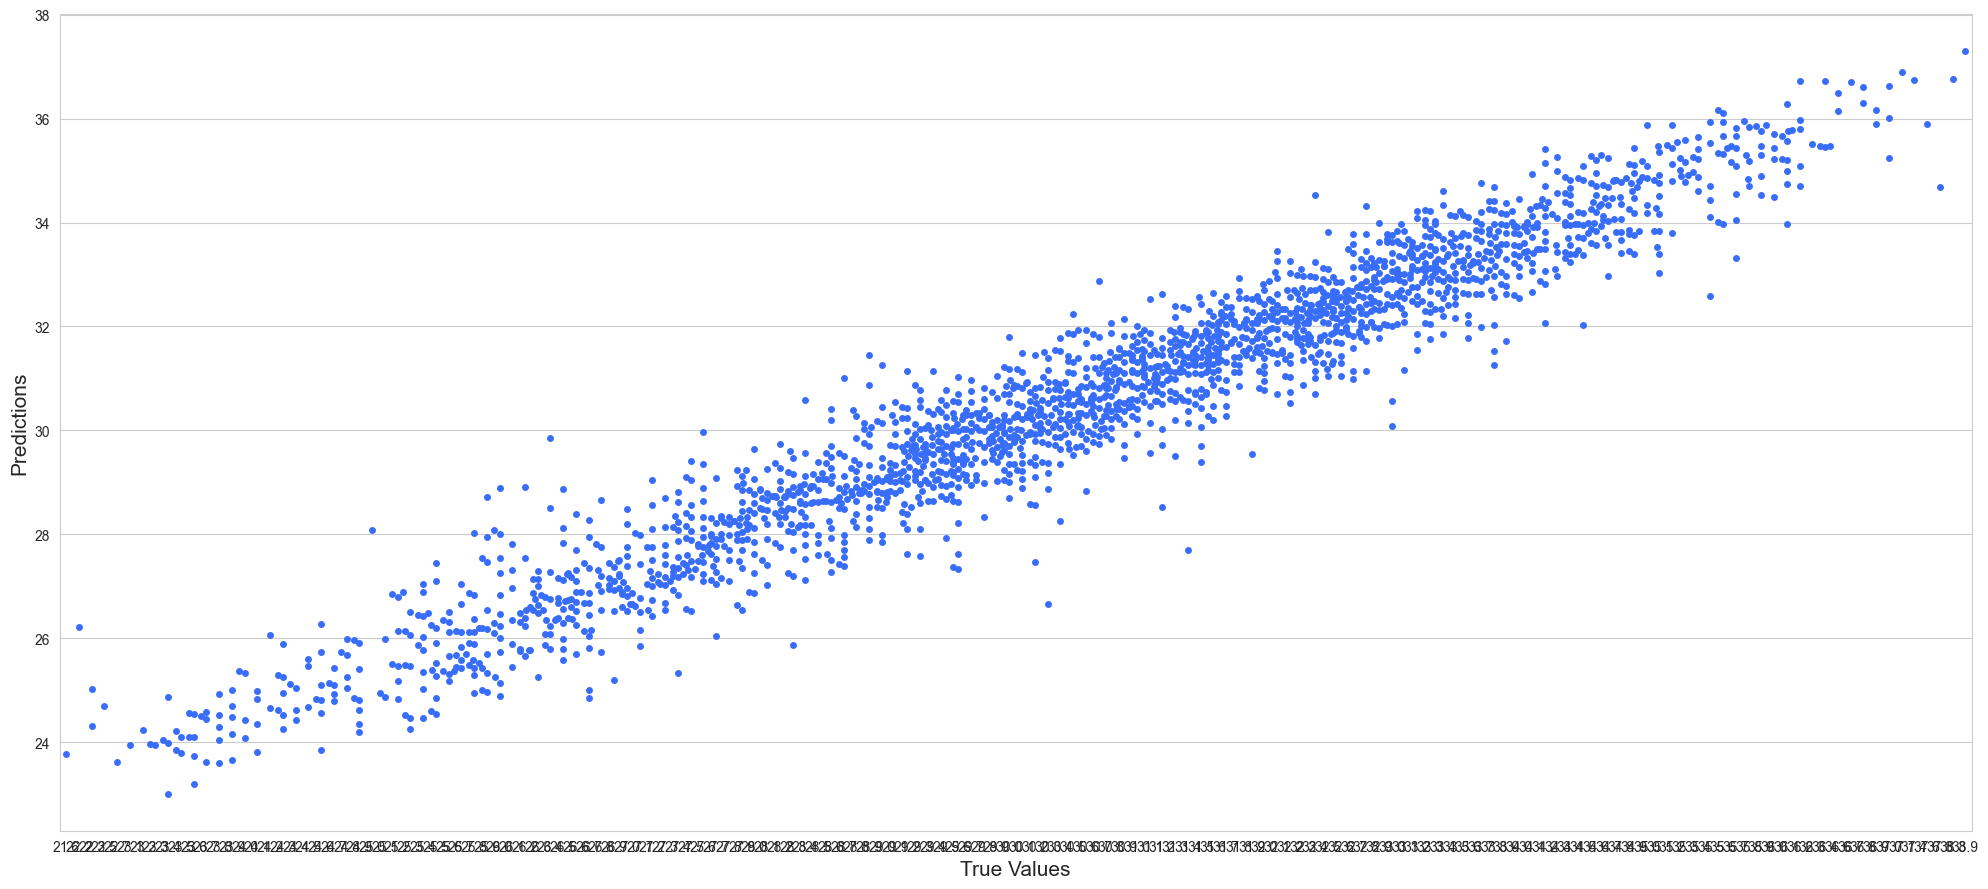

In [121]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Final Regression Saving Model

In [122]:
import joblib
joblib.dump(Final_mod,'Temperature_Forecast_Final.pkl')

['Temperature_Forecast_Final.pkl']

## Prediction According Final Regression Model

In [123]:
# Loading the saved model
Model = joblib.load("Temperature_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted.sample(30)

Actual Values  Predicted Values
270            31.2         30.961290
107            31.4         31.254187
1980           30.9         30.925358
1294           29.9         29.677906
512            25.3         26.149519
1685           31.2         31.247656
2195           30.3         29.383984
2083           27.4         27.560749
598            29.8         29.831409
1299           32.0         31.622000
1223           29.8         29.398067
1343           31.6         32.199062
1587           34.1         33.966820
530            33.4         33.506115
1912           33.8         33.077465
1388           32.3         31.522032
282            30.5         30.233276
1167           33.3         34.019592
833            30.9         30.531588
2118           32.8         32.772388
1439           28.0         28.860079
165            31.9         29.553926
1383           29.5         29.967978
2103           29.5         29.635143
1322           29.2         28.111460
766            31.7         31.900923
1523           32.3         31.813520
1543           34.9         34.262276
1618           32.9         33.147900
727            32.4         32.976242

# Machine Learning Model Building For Next_Tmin

### Standard Scaling

In [124]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [125]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 28)
Training target vector size: (4515,)
Test feature matrix size: (2224, 28)
Test target vector size: (2224,)


### Finding best Random state 

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8526534425534574 on Random_state 288


## Linear Regression Base Model

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted temperature:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual temperature:'+'\033[0m\n',Y_test)

Predicted temperature:
 [23.4191675  24.71717816 23.11041386 ... 22.43899622 26.47068034
 25.22601628]


Actual temperature:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


### Linear Regression Evaluation Matrix

In [130]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7323674790185187
Mean squared error : 0.8525958190135813
Root Mean Squared Error: 0.9233611530780257


 R2 Score :
0.8521112535217081


In [131]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7870765967641132


## Applying other ML Models

In [132]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5549100719424462
Mean squared error : 0.5281326429856116
Root Mean Squared Error: 0.7267273512023691


 R2 Score :
0.9083916753945926


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5204856115107911
Mean squared error : 0.4679723687050357
Root Mean Squared Error: 0.6840850595540263


 R2 Score :
0.9188268984542577


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.816906474820144
Mean squared error : 1.2028507194244606
Root Mean Squared Error: 1.0967455126073964


 R2 Score :
0.7913570754991454


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8361594316884383
Mean squared error : 1.0723262881505033
Root Mean Squared Error: 1.035531886592829


 R2 Score :
0.8139974569031152


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.5967636916900878
Mean squared error : 0.5785517919748113
Root Mean Squared Error: 0.7606259211825557


 R2 Score :
0.8996461190873358


 Error of  XGBReg

In [133]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7928487438611966


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7942783233014363


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.592994585651137


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.746207328370458


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8043369304998889


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_l

we will consider xgbregressor() for the further process 

# Hyper Parameter Tuning : GridSearchCV

In [134]:
from sklearn.model_selection import GridSearchCV


In [135]:
parameter = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'reg_alpha': [0.0, 0.5, 1.0],
    'reg_lambda': [0.0, 0.5, 1.0]
}

In [136]:
GCV = GridSearchCV(XGBRegressor(),parameter)
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'reg_alpha': [0.0, 0.5, 1.0],
                         'reg_lambda': [0.0, 0.5, 1.0]})

In [137]:
GCV.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'reg_alpha': 1.0,
 'reg_lambda': 0.0}

## Final Regression Model For Next_Tmin

In [138]:
Final_mod =  XGBRegressor(n_estimators=200 , max_depth= 7,learning_rate=0.1,colsample_bytree=0.5, reg_alpha=1.0,reg_lambda =0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.4365786902338481
Mean squared error : 0.32861457319542087
Root Mean Squared Error: 0.573249137108309


 R2 Score of Final Model :
0.9429994890655269




 True Values Vs Predicted Value plot :


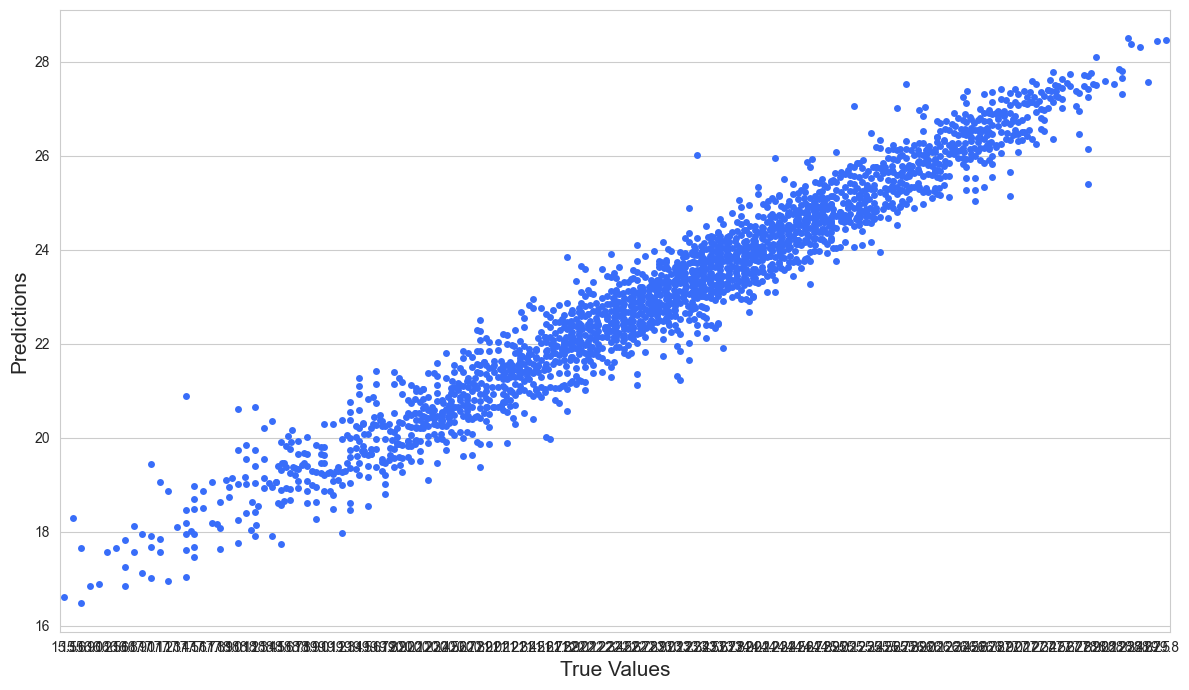

In [140]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Saving Final Regression Model For Next_Tmin

In [141]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']

## Prediction According Final Regression Model For Next_Tmin

In [142]:
# Loading the saved model
Model = joblib.load("Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
df_Predicted = pd.DataFrame({"Actual Values":actual,"Predicted Values":predicted},index= range(len(actual)))
df_Predicted.sample(30)

Actual Values  Predicted Values
1516           25.9         25.779875
1520           26.4         26.130096
1534           20.3         20.411474
1035           21.7         21.463835
983            20.4         20.954712
856            24.5         24.598976
1287           23.3         22.015766
707            22.2         22.224489
2101           19.4         19.585154
1831           19.0         19.293550
2005           25.1         24.446732
675            23.4         23.490759
207            26.1         26.186228
754            21.9         22.014265
779            27.0         26.733028
2216           16.8         17.248623
2053           25.1         24.619822
752            24.1         24.075474
1097           20.6         20.952803
904            21.1         20.686403
1579           18.2         19.549185
1554           24.7         24.821899
1591           21.6         21.515139
1902           26.9         26.884281
869            24.1         23.553961
1551           24.4         24.464247
440            22.6         22.189724
2166           23.0         22.555544
2070           24.6         24.701300
138            27.1         26.315868